In [2]:
import pandas as pd
import sqlite3

In [3]:
! pip install ipython-sql

In [4]:
connection = sqlite3.connect('jupyter_sql.db')

In [5]:
%load_ext sql

In [6]:
%sql sqlite:///jupyter_sql.db

In [9]:
lang = pd.read_csv('/Users/mishudhar/Downloads/Join_SQL/countries/languages.csv')
lang.to_sql('languages', connection)

955

In [13]:
country = pd.read_csv('/Users/mishudhar/Downloads/Join_SQL/countries/countries.csv')
country = country.rename(columns = {'country_name': 'name'})
country.to_sql('countries', connection)

205

In [15]:
currency = pd.read_csv('/Users/mishudhar/Downloads/Join_SQL/countries/currencies.csv')
currency.to_sql('currencies', connection)

224

In [16]:
city = pd.read_csv('/Users/mishudhar/Downloads/Join_SQL/countries/cities.csv')
city.to_sql('cities', connection)

236

In [17]:
eco = pd.read_csv('/Users/mishudhar/Downloads/Join_SQL/countries/economies.csv')
eco.to_sql('economies', connection)

380

In [19]:
eco2015 = pd.read_csv('/Users/mishudhar/Downloads/Join_SQL/countries/economies2015.csv')
eco2015.to_sql('economies2015', connection)

166

In [20]:
eco2019 = pd.read_csv('/Users/mishudhar/Downloads/Join_SQL/countries/economies2019.csv')
eco2019.to_sql('economies2019', connection)

151

In [21]:
euCountry = pd.read_csv('/Users/mishudhar/Downloads/Join_SQL/countries/eu_countries.csv')
euCountry.to_sql('eu_countries', connection)

27

In [22]:
pop = pd.read_csv('/Users/mishudhar/Downloads/Join_SQL/countries/populations.csv')
pop.to_sql('populations', connection)

434

In [23]:
mon = pd.read_csv('/Users/mishudhar/Downloads/Join_SQL/leaders/monarchs.csv')
mon.to_sql('monarchs', connection)

4

In [24]:
pres = pd.read_csv('/Users/mishudhar/Downloads/Join_SQL/leaders/presidents.csv')
pres.to_sql('presidents', connection)

7

In [25]:
p_term = pd.read_csv('/Users/mishudhar/Downloads/Join_SQL/leaders/prime_minister_terms.csv')
p_term.to_sql('prime_minsiter_term', connection)

10

In [26]:
prim = pd.read_csv('/Users/mishudhar/Downloads/Join_SQL/leaders/prime_ministers.csv')
prim.to_sql('prime_minister', connection)

10

In [28]:
sta = pd.read_csv('/Users/mishudhar/Downloads/Join_SQL/leaders/states.csv')
sta.to_sql('states', connection)

11

# Inner join

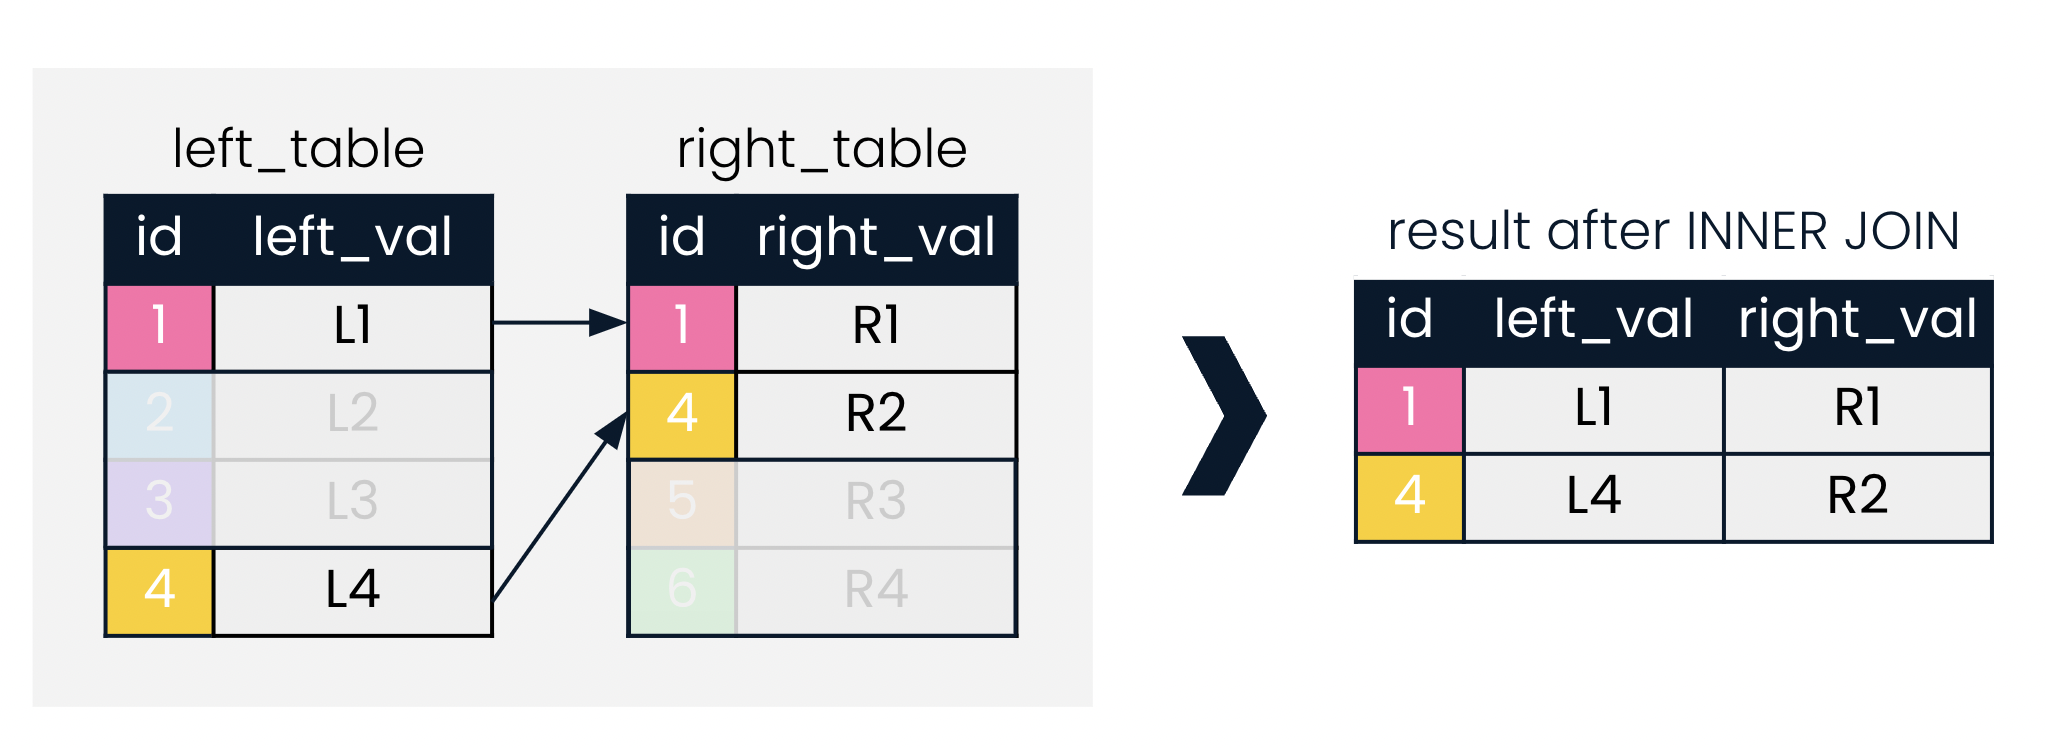

In [163]:
from IPython.display import Image
Image(filename = '/Users/mishudhar/Downloads/diagrams/inner_join2.png', width = 600, height = 600)

# Inner joins perform join on one key field and returs all the records asspciated with those fields.

In [126]:
%%sql
SELECT *
FROM prime_minister
LIMIT 3;

 * sqlite:///jupyter_sql.db
Done.


[(0, 'Egypt', 'Africa', 'Mostafa Madbouly'),
 (1, 'Portugal', 'Europe', 'António Costa'),
 (2, 'Pakistan', 'Asia', 'Shehbaz Sharif')]

In [132]:
%%sql
SELECT *
FROM presidents
LIMIT 3;

 * sqlite:///jupyter_sql.db
Done.


[(0, 'Egypt', 'Africa', 'Abdel Fattah el-Sisi'),
 (1, 'Portugal', 'Europe', 'Marcelo Rebelo de Sousa'),
 (2, 'USA', 'North America', 'Joe Biden')]

Suppose we want to have identify those countries that have both PM and Presidents

In [162]:
%%sql
SELECT pm.country, pm.continent, prime_minister, president
FROM prime_minister AS pm
INNER JOIN presidents AS p
ON pm.country = p.country;

 * sqlite:///jupyter_sql.db
Done.


[('Egypt', 'Africa', 'Mostafa Madbouly', 'Abdel Fattah el-Sisi'),
 ('Portugal', 'Europe', 'António Costa', 'Marcelo Rebelo de Sousa'),
 ('Pakistan', 'Asia', 'Shehbaz Sharif', 'Arif Alvi'),
 ('India', 'Asia', 'Narendra Modi', 'Ram Nath Kovind')]

In [139]:
%%sql
SELECT cities.name AS city, countries.name AS country, countries.region
FROM cities
INNER JOIN countries
ON cities.country_code = countries.code
LIMIT 5;

 * sqlite:///jupyter_sql.db
Done.


[('Abidjan', "Cote d'Ivoire", 'Western Africa'),
 ('Abu Dhabi', 'United Arab Emirates', 'Middle East'),
 ('Abuja', 'Nigeria', 'Western Africa'),
 ('Accra', 'Ghana', 'Western Africa'),
 ('Addis Ababa', 'Ethiopia', 'Eastern Africa')]

# The languages table has a key(column) named official( true or false). Let's have a look on countries that have both official and unofficial languages

In [141]:
%%sql
select *
from languages
limit 3;

 * sqlite:///jupyter_sql.db
Done.


[(0, 1, 'AFG', 'Dari', 50.0, 1),
 (1, 2, 'AFG', 'Pashto', 35.0, 1),
 (2, 3, 'AFG', 'Turkic', 11.0, 0)]

In [144]:
%%sql
SELECT c.code AS country_code, l.name, official
FROM countries AS c
INNER JOIN languages AS l
USING(code)
LIMIT 10;

 * sqlite:///jupyter_sql.db
Done.


[('AFG', 'Dari', 1),
 ('AFG', 'Other', 0),
 ('AFG', 'Pashto', 1),
 ('AFG', 'Turkic', 0),
 ('NLD', 'Dutch', 1),
 ('ALB', 'Albanian', 1),
 ('ALB', 'Greek', 0),
 ('ALB', 'Other', 0),
 ('ALB', 'unspecified', 0),
 ('DZA', 'Arabic', 1)]

In [145]:
%%sql
SELECT c.name AS country, l.name AS language
FROM countries AS c
INNER JOIN languages AS l
USING(code);

 * sqlite:///jupyter_sql.db
Done.


[('Afghanistan', 'Dari'),
 ('Afghanistan', 'Other'),
 ('Afghanistan', 'Pashto'),
 ('Afghanistan', 'Turkic'),
 ('Netherlands', 'Dutch'),
 ('Albania', 'Albanian'),
 ('Albania', 'Greek'),
 ('Albania', 'Other'),
 ('Albania', 'unspecified'),
 ('Algeria', 'Arabic'),
 ('Algeria', 'Berber or Tamazight'),
 ('Algeria', 'French'),
 ('Algeria', 'Mzab'),
 ('Algeria', 'Shawiya'),
 ('Algeria', 'Tuareg'),
 ('American Samoa', 'English'),
 ('American Samoa', 'Other'),
 ('American Samoa', 'Other'),
 ('American Samoa', 'Samoan'),
 ('American Samoa', 'Tongan'),
 ('Andorra', 'Castilian'),
 ('Andorra', 'Catalan'),
 ('Andorra', 'French'),
 ('Andorra', 'Portuguese'),
 ('Angola', 'Chokwe'),
 ('Angola', 'Fiote'),
 ('Angola', 'Kikongo'),
 ('Angola', 'Kimbundu'),
 ('Angola', 'Kwanhama'),
 ('Angola', 'Luvale'),
 ('Angola', 'Muhumbi'),
 ('Angola', 'Nganguela'),
 ('Angola', 'Nhaneca'),
 ('Angola', 'Other'),
 ('Angola', 'Portuguese'),
 ('Angola', 'Umbundu'),
 ('Antigua and Barbuda', 'Antiguan creole'),
 ('Antigua and Barbuda', 'English'),
 ('United Arab Emirates', 'Arabic'),
 ('United Arab Emirates', 'English'),
 ('United Arab Emirates', 'Hindi'),
 ('United Arab Emirates', 'Persian'),
 ('United Arab Emirates', 'Urdu'),
 ('Argentina', 'English'),
 ('Argentina', 'French'),
 ('Argentina', 'German'),
 ('Argentina', 'Italian'),
 ('Argentina', 'Spanish'),
 ('Argentina', 'indigenous'),
 ('Armenia', 'Armenian'),
 ('Armenia', 'Kurdish'),
 ('Armenia', 'Other'),
 ('Aruba', 'Chinese'),
 ('Aruba', 'Dutch'),
 ('Aruba', 'English'),
 ('Aruba', 'Other'),
 ('Aruba', 'Papiamento'),
 ('Aruba', 'Spanish'),
 ('Aruba', 'unspecified'),
 ('Australia', 'Arabic'),
 ('Australia', 'Cantonese'),
 ('Australia', 'English'),
 ('Australia', 'Greek'),
 ('Australia', 'Italian'),
 ('Australia', 'Mandarin'),
 ('Australia', 'Other'),
 ('Australia', 'Vietnamese'),
 ('Australia', 'unspecified'),
 ('Azerbaijan', 'Armenian'),
 ('Azerbaijan', 'Azerbaijani'),
 ('Azerbaijan', 'Other'),
 ('Azerbaijan', 'Russian'),
 ('Bahamas', 'Creole'),
 ('Bahamas', 'English'),
 ('Bahrain', 'Arabic'),
 ('Bahrain', 'English'),
 ('Bahrain', 'Farsi'),
 ('Bahrain', 'Urdu'),
 ('Bangladesh', 'Bangla'),
 ('Bangladesh', 'Other'),
 ('Barbados', 'Bajan'),
 ('Barbados', 'English'),
 ('Belgium', 'Dutch'),
 ('Belgium', 'French'),
 ('Belgium', 'German'),
 ('Belize', 'Creole'),
 ('Belize', 'English'),
 ('Belize', 'Garifuna'),
 ('Belize', 'German'),
 ('Belize', 'Maya'),
 ('Belize', 'Other'),
 ('Belize', 'Spanish'),
 ('Belize', 'none'),
 ('Belize', 'unknown'),
 ('Benin', 'Fon and Yoruba'),
 ('Benin', 'French'),
 ('Benin', 'Tribal Languages'),
 ('Bermuda', 'English'),
 ('Bermuda', 'Portuguese'),
 ('Bhutan', 'Dzongkha'),
 ('Bhutan', 'Lhotshamkha'),
 ('Bhutan', 'Other'),
 ('Bhutan', 'Sharchhopka'),
 ('Bolivia', 'Aymara'),
 ('Bolivia', 'Foreign Languages'),
 ('Bolivia', 'Guarani'),
 ('Bolivia', 'Other'),
 ('Bolivia', 'Quechua'),
 ('Bolivia', 'Spanish'),
 ('Bolivia', 'none'),
 ('Bosnia and Herzegovina', 'Bosnian'),
 ('Bosnia and Herzegovina', 'Croatian'),
 ('Bosnia and Herzegovina', 'No Answer'),
 ('Bosnia and Herzegovina', 'Other'),
 ('Bosnia and Herzegovina', 'Serbian'),
 ('Botswana', 'English'),
 ('Botswana', 'Ndebele'),
 ('Botswana', 'Other'),
 ('Botswana', 'Sekalanga'),
 ('Botswana', 'Sembukushu'),
 ('Botswana', 'Sesarwa'),
 ('Botswana', 'Setswana'),
 ('Botswana', 'Shekgalagadi'),
 ('Botswana', 'Zezuru'),
 ('Brazil', 'Portuguese'),
 ('United Kingdom', 'English'),
 ('Brunei', 'Chinese'),
 ('Brunei', 'English'),
 ('Brunei', 'Malay'),
 ('Bulgaria', 'Bulgarian'),
 ('Bulgaria', 'Other'),
 ('Bulgaria', 'Romani'),
 ('Bulgaria', 'Turkish'),
 ('Bulgaria', 'unspecified'),
 ('Burkina Faso', 'French'),
 ('Burkina Faso', 'Sudanic family'),
 ('Burundi', 'English'),
 ('Burundi', 'French'),
 ('Burundi', 'Kirundi'),
 ('Burundi', 'Other'),
 ('Burundi', 'Swahili'),
 ('Burundi', 'unspecified'),
 ('Cayman Islands', 'English'),
 ('Cayman Islands', 'Filipino'),
 ('Cayman Islands', 'Other'),
 ('Cayman Islands', 'Spanish'),
 ('Cayman Islands', 'unspecified'),
 (

# Multiple join
Join on join

select *

from lef_table

Inner join right_table

on left_table.id = right_table.id

inner join another_table

on left_table.id = right_table.id

It is also possible to peform the second join by using right_table's id

we have three tables such as prime_ministers, presidents and prime_minister_term. We want to see the countries that have both PM and president and their PM started

In [148]:
%%sql
select *
from prime_minsiter_term
limit 3;

 * sqlite:///jupyter_sql.db
Done.


[(0, 'Mostafa Madbouly', 2018),
 (1, 'António Costa', 2015),
 (2, 'Shehbaz Sharif', 2022)]

In [154]:
%%sql
SELECT pm.country, pm.continent, pm.prime_minister, president, pm_start
FROM prime_minister AS pm
INNER JOIN presidents AS p
ON pm.country = p.country
INNER JOIN prime_minsiter_term AS p_term
ON pm.prime_minister = p_term.prime_minister;


 * sqlite:///jupyter_sql.db
Done.


[('Egypt', 'Africa', 'Mostafa Madbouly', 'Abdel Fattah el-Sisi', 2018),
 ('Portugal', 'Europe', 'António Costa', 'Marcelo Rebelo de Sousa', 2015),
 ('Pakistan', 'Asia', 'Shehbaz Sharif', 'Arif Alvi', 2022),
 ('India', 'Asia', 'Narendra Modi', 'Ram Nath Kovind', 2014)]

In [158]:
%%sql
SELECT name, e.year, fertility_rate, unemployment_rate
FROM countries AS c
INNER JOIN populations AS p
ON c.code = p.country_code
INNER JOIN economies AS e
ON c.code = e.code
   AND p.year = e.year;

 * sqlite:///jupyter_sql.db
Done.


[('Afghanistan', 2010, 5.746, None),
 ('Afghanistan', 2015, 4.653, None),
 ('Netherlands', 2010, 1.79, 4.995),
 ('Netherlands', 2015, 1.71, 6.891),
 ('Albania', 2010, 1.663, 14.0),
 ('Albania', 2015, 1.793, 17.1),
 ('Algeria', 2010, 2.873, 9.961),
 ('Algeria', 2015, 2.805, 11.214),
 ('Angola', 2010, 6.416, None),
 ('Angola', 2015, 5.996, None),
 ('Antigua and Barbuda', 2010, 2.13, None),
 ('Antigua and Barbuda', 2015, 2.063, None),
 ('United Arab Emirates', 2010, 1.868, None),
 ('United Arab Emirates', 2015, 1.767, None),
 ('Argentina', 2010, 2.37, 7.75),
 ('Argentina', 2015, 2.308, None),
 ('Armenia', 2010, 1.648, 19.0),
 ('Armenia', 2015, 1.517, 18.5),
 ('Australia', 2010, 1.928, 5.208),
 ('Australia', 2015, 1.833, 6.058),
 ('Azerbaijan', 2010, 1.92, 6.048),
 ('Azerbaijan', 2015, 1.97, 6.048),
 ('Bahamas', 2010, 1.904, 15.082),
 ('Bahamas', 2015, 1.861, 13.379),
 ('Bahrain', 2010, 2.142, 3.6),
 ('Bahrain', 2015, 2.035, None),
 ('Bangladesh', 2010, 2.332, None),
 ('Bangladesh', 2015, 2.144, None),
 ('Barbados', 2010, 1.781, 10.25),
 ('Barbados', 2015, 1.796, 11.3),
 ('Belgium', 2010, 1.86, 8.317),
 ('Belgium', 2015, 1.74, 8.492),
 ('Belize', 2010, 2.714, 13.502),
 ('Belize', 2015, 2.546, 10.114),
 ('Benin', 2010, 5.094, None),
 ('Benin', 2015, 4.688, None),
 ('Bhutan', 2010, 2.331, 3.3),
 ('Bhutan', 2015, 1.984, 3.2),
 ('Bolivia', 2010, 3.2, 4.375),
 ('Bolivia', 2015, 2.923, 4.0),
 ('Bosnia and Herzegovina', 2010, 1.288, 27.202),
 ('Bosnia and Herzegovina', 2015, 1.253, 27.7),
 ('Botswana', 2010, 2.893, None),
 ('Botswana', 2015, 2.799, None),
 ('Brazil', 2010, 1.838, 8.556),
 ('Brazil', 2015, 1.778, 8.3),
 ('United Kingdom', 2010, 1.92, 7.9),
 ('United Kingdom', 2015, 1.81, 5.4),
 ('Brunei', 2010, 1.953, None),
 ('Brunei', 2015, 1.856, 6.9),
 ('Bulgaria', 2010, 1.57, 10.306),
 ('Bulgaria', 2015, 1.53, 9.235),
 ('Burkina Faso', 2010, 5.867, None),
 ('Burkina Faso', 2015, 5.437, None),
 ('Burundi', 2010, 6.302, None),
 ('Burundi', 2015, 5.863, None),
 ('Chile', 2010, 1.824, 8.153),
 ('Chile', 2015, 1.749, 6.214),
 ('Costa Rica', 2010, 1.922, 7.345),
 ('Costa Rica', 2015, 1.8, 9.249),
 ('Djibouti', 2010, 3.484, None),
 ('Djibouti', 2015, 3.131, None),
 ('Dominica', 2010, None, None),
 ('Dominica', 2015, None, None),
 ('Dominican Republic', 2010, 2.597, 5.001),
 ('Dominican Republic', 2015, 2.451, 5.94),
 ('Ecuador', 2010, 2.656, 5.019),
 ('Ecuador', 2015, 2.513, 4.77),
 ('Egypt', 2010, 3.184, 9.21),
 ('Egypt', 2015, 3.314, 12.859),
 ('El Salvador', 2010, 2.078, 7.05),
 ('El Salvador', 2015, 1.909, 7.0),
 ('Eritrea', 2010, 4.605, None),
 ('Eritrea', 2015, 4.207, None),
 ('Spain', 2010, 1.37, 19.858),
 ('Spain', 2015, 1.32, 22.058),
 ('South Africa', 2010, 2.467, 24.875),
 ('South Africa', 2015, 2.339, 25.35),
 ('Ethiopia', 2010, 4.903, None),
 ('Ethiopia', 2015, 4.275, None),
 ('Fiji Islands', 2010, 2.669, 8.9),
 ('Fiji Islands', 2015, 2.54, 8.75),
 ('Philippines', 2010, 3.133, 7.325),
 ('Philippines', 2015, 2.944, 6.275),
 ('Gabon', 2010, 4.083, None),
 ('Gabon', 2015, 3.849, None),
 ('Gambia', 2010, 5.796, None),
 ('Gambia', 2015, 5.674, None),
 ('Georgia', 2010, 1.82, 16.291),
 ('Georgia', 2015, 1.815, 11.95),
 ('Ghana', 2010, 4.272, None),
 ('Ghana', 2015, 4.117, None),
 ('Grenada', 2010, 2.24, None),
 ('Grenada', 2015, 2.127, None),
 ('Guatemala', 2010, 3.434, None),
 ('Guatemala', 2015, 3.159, None),
 ('Guinea', 2010, 5.337, None),
 ('Guinea', 2015, 4.932, None),
 ('Guinea-Bissau', 2010, 5.091, None),
 ('Guinea-Bissau', 2015, 4.761, None),
 ('Guyana', 2010, 2.68, None),
 ('Guyana', 2015, 2.532, None),
 ('Haiti', 2010, 3.325, None),
 ('Haiti', 2015, 2.973, None),
 ('Honduras', 2010, 2.695, 4.8),
 ('Honduras', 2015, 2.332, 4.0),
 ('Indonesia', 2010, 2.513, 7.14),
 ('Indonesia', 2015, 2.437, 6.18),
 ('India', 2010, 2.622, None),
 ('India', 2015, 2.395, None),
 ('Iraq', 2010, 4.659, None),
 ('Iraq', 2015, 4.515, None),
 ('Iran', 2010, 1.765, 13.5),
 ('Iran', 2015, 1.685, 11.0),
 ('Ireland', 2010, 2.05, 13.917),
 ('Ireland', 20

# Left JOIN

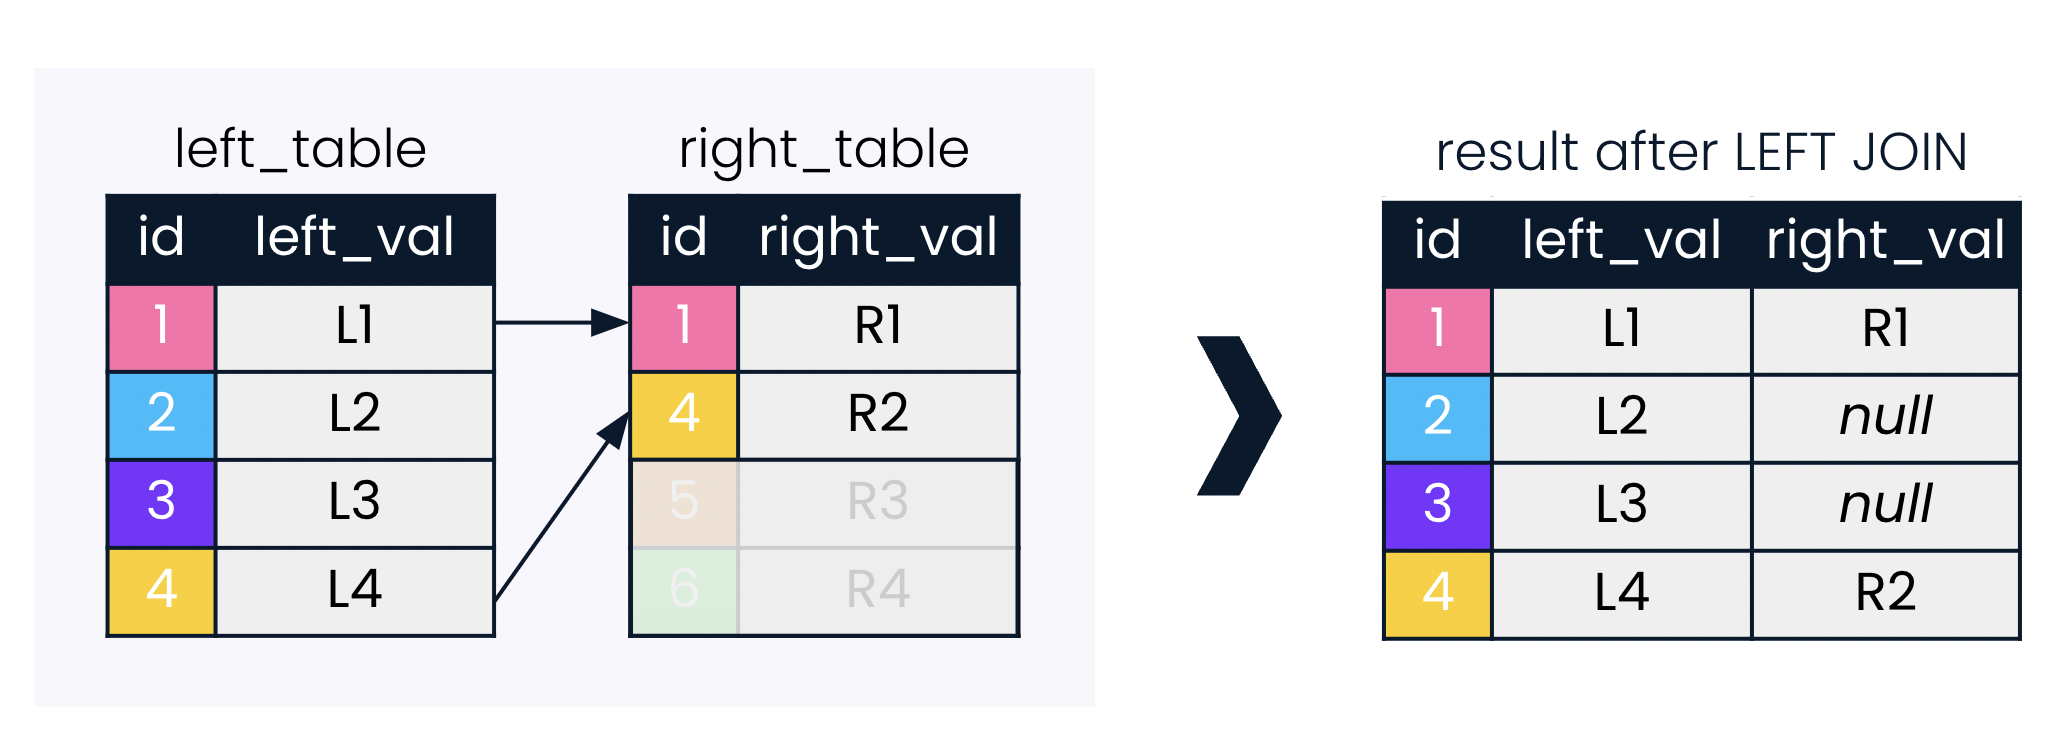

In [160]:
from IPython.display import Image
Image(filename = '/Users/mishudhar/Downloads/diagrams/left_join2.png', width = 600, height = 600)

all the countries and their prime ministers and presidents if they have. if they do not have presidents it will return null value

In [167]:
%%sql
SELECT pm.country, prime_minister, president
FROM prime_minister AS pm
LEFT JOIN presidents AS p
USING(country);

 * sqlite:///jupyter_sql.db
Done.


[('Egypt', 'Mostafa Madbouly', 'Abdel Fattah el-Sisi'),
 ('Portugal', 'António Costa', 'Marcelo Rebelo de Sousa'),
 ('Pakistan', 'Shehbaz Sharif', 'Arif Alvi'),
 ('United Kingdom', 'Boris Johnson', None),
 ('India', 'Narendra Modi', 'Ram Nath Kovind'),
 ('Australia', 'Scott Morrison', None),
 ('Norway', 'Jonas Gahr Støre', None),
 ('Brunei', 'Hassanal Bolkiah', None),
 ('Oman', 'Haitham bin Tarik', None),
 ('New Zealand', 'Jacinda Ardern', None)]

Right join is the opposite of left join. It will return all the records from right table and it's associated records from the left_table. And null if there are no associated records.

In [168]:
%%sql
SELECT pm.country, prime_minister, president
FROM prime_minister AS pm
RIGHT JOIN presidents AS p
USING(country);

 * sqlite:///jupyter_sql.db
Done.


[('Egypt', 'Mostafa Madbouly', 'Abdel Fattah el-Sisi'),
 ('Portugal', 'António Costa', 'Marcelo Rebelo de Sousa'),
 ('Pakistan', 'Shehbaz Sharif', 'Arif Alvi'),
 ('India', 'Narendra Modi', 'Ram Nath Kovind'),
 (None, None, 'Joe Biden'),
 (None, None, 'Luis Lacalle Pou'),
 (None, None, 'Gabriel Boric')]

In [169]:
%%sql
SELECT c.name AS country, region, gdp_percapita
FROM countries AS c
LEFT JOIN economies AS e
USING(code)
WHERE year = 2010;

 * sqlite:///jupyter_sql.db
Done.


[('Afghanistan', 'Southern and Central Asia', 539.667),
 ('Angola', 'Central Africa', 3599.27),
 ('Albania', 'Southern Europe', 4098.13),
 ('United Arab Emirates', 'Middle East', 34628.63),
 ('Argentina', 'South America', 10412.95),
 ('Armenia', 'Middle East', 3121.78),
 ('Antigua and Barbuda', 'Caribbean', 13531.78),
 ('Australia', 'Australia and New Zealand', 56362.84),
 ('Austria', 'Western Europe', 46757.13),
 ('Azerbaijan', 'Middle East', 5847.26),
 ('Burundi', 'Eastern Africa', 242.84),
 ('Belgium', 'Western Europe', 44691.32),
 ('Benin', 'Western Africa', 734.278),
 ('Burkina Faso', 'Western Africa', 588.584),
 ('Bangladesh', 'Southern and Central Asia', 807.531),
 ('Bulgaria', 'Eastern Europe', 6743.74),
 ('Bahrain', 'Middle East', 20823.22),
 ('Bahamas', 'Caribbean', 22957.79),
 ('Bosnia and Herzegovina', 'Southern Europe', 4404.37),
 ('Belarus', 'Eastern Europe', 6023.15),
 ('Belize', 'Central America', 4321.29),
 ('Bolivia', 'South America', 1994.91),
 ('Brazil', 'South America', 11297.84),
 ('Barbados', 'Caribbean', 16079.89),
 ('Brunei', 'Southeast Asia', 35437.22),
 ('Bhutan', 'Southern and Central Asia', 1998.75),
 ('Botswana', 'Southern Africa', 6853.67),
 ('Central African Republic', 'Central Africa', 456.564),
 ('Canada', 'North America', 47512.68),
 ('Switzerland', 'Western Europe', 74570.66),
 ('Chile', 'South America', 12789.76),
 ('China', 'Eastern Asia', 4524.06),
 ("Cote d'Ivoire", 'Western Africa', 1195.44),
 ('Cameroon', 'Central Africa', 1158.78),
 ('Congo, The Democratic Republic of the', 'Central Africa', 292.955),
 ('Congo', 'Central Africa', 3183.68),
 ('Colombia', 'South America', 6305.29),
 ('Comoros', 'Eastern Africa', 789.466),
 ('Cape Verde', 'Western Africa', 3413.26),
 ('Costa Rica', 'Central America', 8300.69),
 ('Cyprus', 'Middle East', 31262.53),
 ('Czech Republic', 'Eastern Europe', 19787.29),
 ('Germany', 'Western Europe', 42641.68),
 ('Djibouti', 'Eastern Africa', 1306.54),
 ('Dominica', 'Caribbean', 6975.99),
 ('Denmark', 'Nordic Countries', 58177.16),
 ('Dominican Republic', 'Caribbean', 5685.77),
 ('Algeria', 'Northern Africa', 4480.72),
 ('Ecuador', 'South America', 4633.25),
 ('Egypt', 'Northern Africa', 2921.76),
 ('Eritrea', 'Eastern Africa', 395.645),
 ('Spain', 'Southern Europe', 30802.85),
 ('Estonia', 'Baltic Countries', 14654.28),
 ('Ethiopia', 'Eastern Africa', 360.829),
 ('Finland', 'Nordic Countries', 46391.71),
 ('Fiji Islands', 'Melanesia', 3780.24),
 ('France', 'Western Europe', 42249.06),
 ('Micronesia, Federated States of', 'Micronesia', 2888.18),
 ('Gabon', 'Central Africa', 8917.32),
 ('United Kingdom', 'British Islands', 38737.56),
 ('Georgia', 'Middle East', 2951.24),
 ('Ghana', 'Western Africa', 1357.64),
 ('Guinea', 'Western Africa', 435.728),
 ('Gambia', 'Western Africa', 562.2),
 ('Guinea-Bissau', 'Western Africa', 582.54),
 ('Equatorial Guinea', 'Central Africa', 23411.83),
 ('Greece', 'Southern Europe', 26972.87),
 ('Grenada', 'Caribbean', 7365.67),
 ('Guatemala', 'Central America', 2875.31),
 ('Guyana', 'South America', 3004.23),
 ('Honduras', 'Central America', 2096.2),
 ('Croatia', 'Southern Europe', 13505.03),
 ('Haiti', 'Caribbean', 662.013),
 ('Hungary', 'Eastern Europe', 13007.56),
 ('Indonesia', 'Southeast Asia', 3178.13),
 ('India', 'Southern and Central Asia', 1429.6),
 ('Ireland', 'British Islands', 48439.1),
 ('Iran', 'Southern and Central Asia', 6252.52),
 ('Iraq', 'Middle East', 4473.71),
 ('Iceland', 'Nordic Countries', 41622.66),
 ('Israel', 'Middle East', 30673.39),
 ('Italy', 'Southern Europe', 35969.19),
 ('Jamaica', 'Caribbean', 4812.07),
 ('Jordan', 'Middle East', 4322.82),
 ('Japan', 'Eastern Asia', 44673.61),
 ('Kazakhstan', 'Southern and Central Asia', 9008.71),
 ('Kenya', 'Eastern Africa', 1038.95),
 ('Kyrgyzstan', 'Southern and Central Asia', 875.264),
 ('Cambodia', 'Southeast Asia', 781.912),
 ('Kiribati', 'Micronesia', 1490.9),
 ('Saint Kitts and Nevis', 'Caribbean', 13466.83),
 ('South Korea', 'Eastern Asia', 22086.95),
 ('Ku

To calculate per capita GDP per region, begin by grouping by region.

In [170]:
%%sql
SELECT region, AVG(gdp_percapita) AS avg_gdp
FROM countries AS c
LEFT JOIN economies AS e
USING(code)
WHERE year = 2010
GROUP BY region;

 * sqlite:///jupyter_sql.db
Done.


[('Australia and New Zealand', 44792.384999999995),
 ('Baltic Countries', 12631.029999999999),
 ('British Islands', 43588.33),
 ('Caribbean', 11413.339461538462),
 ('Central Africa', 4797.239888888889),
 ('Central America', 4969.969999999999),
 ('Eastern Africa', 1757.3481875),
 ('Eastern Asia', 24962.807999999997),
 ('Eastern Europe', 10095.456666666667),
 ('Melanesia', 2532.6099999999997),
 ('Micronesia', 4497.652),
 ('Middle East', 18204.64176470588),
 ('Nordic Countries', 57073.998),
 ('North America', 47911.509999999995),
 ('Northern Africa', 4713.861666666667),
 ('Polynesia', 3451.3633333333332),
 ('South America', 7420.599166666667),
 ('Southeast Asia', 10547.154400000001),
 ('Southern Africa', 5051.598),
 ('Southern Europe', 22926.410909090908),
 ('Southern and Central Asia', 2797.1549999999997),
 ('Western Africa', 998.9548750000001),
 ('Western Europe', 58130.962857142855)]

# Full join

select
left_table.id as l_id,

right_table.id as r_id,

left_table.value as l_value,

right_table.value as r_value

FROM left_table

FULL JOIN right_table

USING(id);

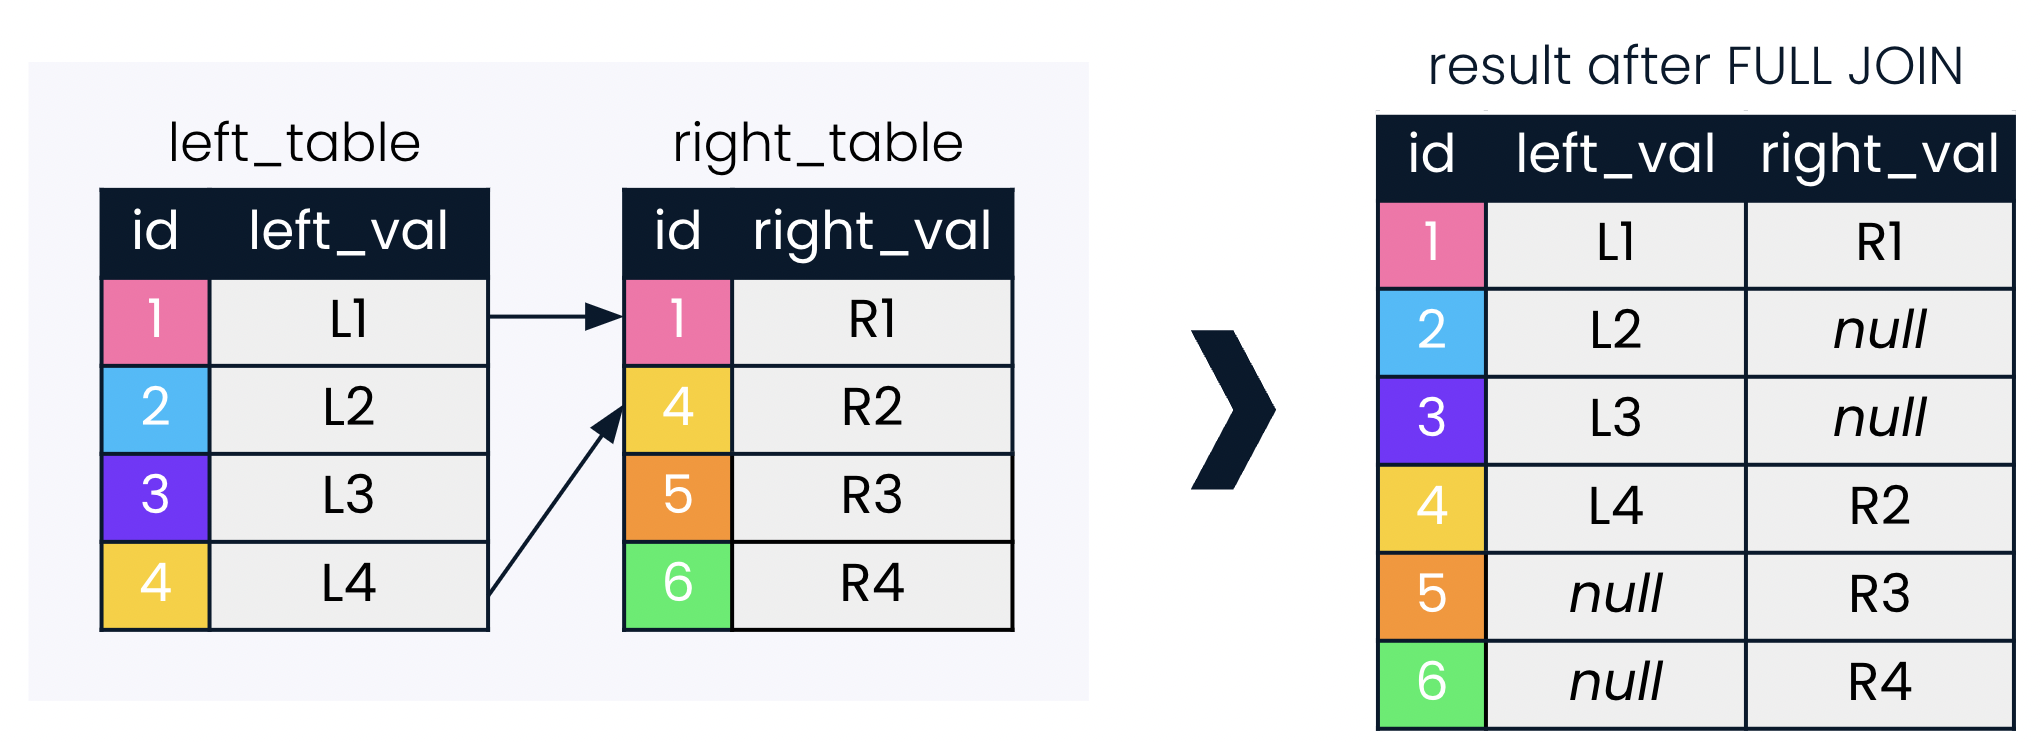

In [171]:
from IPython.display import Image
Image(filename = '/Users/mishudhar/Downloads/diagrams/full_join2.png', width = 600, height = 600)

Perform a full join with countries (left) and currencies (right).
Filter for the North America region or NULL country names.

In [177]:
%%sql
SELECT name AS country, code, region, basic_unit
FROM countries
FULL JOIN currencies
USING(code)
WHERE (region = 'North America' OR name IS NULL)
ORDER BY region;

 * sqlite:///jupyter_sql.db
Done.


[(None, 'AIA', None, 'East Caribbean dollar'),
 (None, 'IOT', None, 'United States dollar'),
 (None, 'CCK', None, 'Australian dollar'),
 (None, 'COK', None, 'New Zealand dollar'),
 (None, 'TMP', None, 'United States dollar'),
 (None, 'FLK', None, 'Falkland Islands pound'),
 (None, 'HKG', None, 'Hong Kong dollar'),
 (None, 'MSR', None, 'East Caribbean dollar'),
 (None, 'NIU', None, 'New Zealand dollar'),
 (None, 'ROM', None, 'Romanian leu'),
 (None, 'SHN', None, 'Saint Helena pound'),
 (None, 'SGS', None, 'British pound'),
 (None, 'TWN', None, 'New Taiwan dollar'),
 (None, 'WLF', None, 'CFP franc'),
 ('Bermuda', 'BMU', 'North America', 'Bermudian dollar'),
 ('Greenland', 'GRL', 'North America', None),
 ('Canada', 'CAN', 'North America', 'Canadian dollar'),
 ('United States', 'USA', 'North America', 'United States dollar')]

Repeat the same query as before, turning your full join into a left join with the currencies table.
Have a look at what has changed in the output by comparing it to the full join result.

In [178]:
%%sql
SELECT name AS country, code, region, basic_unit
FROM countries
LEFT JOIN currencies
USING(code)
WHERE (region = 'North America' OR name IS NULL)
ORDER BY region;

 * sqlite:///jupyter_sql.db
Done.


[('Bermuda', 'BMU', 'North America', 'Bermudian dollar'),
 ('Greenland', 'GRL', 'North America', None),
 ('Canada', 'CAN', 'North America', 'Canadian dollar'),
 ('United States', 'USA', 'North America', 'United States dollar')]

Repeat the same query again, this time performing an inner join of countries with currencies.
Have a look at what has changed in the output by comparing it to the full join and left join results!

In [179]:
%%sql
SELECT name AS country, code, region, basic_unit
FROM countries
INNER JOIN currencies
USING(code)
WHERE (region = 'North America' OR name IS NULL)
ORDER BY region;

 * sqlite:///jupyter_sql.db
Done.


[('Bermuda', 'BMU', 'North America', 'Bermudian dollar'),
 ('Canada', 'CAN', 'North America', 'Canadian dollar'),
 ('United States', 'USA', 'North America', 'United States dollar')]

Complete the FULL JOIN with countries as c1 on the left and languages as l on the right, using code to perform this join.

Next, chain this join with another FULL JOIN, placing currencies on the right, joining on code again.




In [185]:
%%sql
SELECT c.name AS country, region, l.name AS language, basic_unit, frac_unit
FROM countries AS c
FULL JOIN languages AS l
USING(code)
FULL JOIN currencies AS c2
USING(code)
WHERE region LIKE 'M%esia'
LIMIT 10;

 * sqlite:///jupyter_sql.db
Done.


[('Fiji Islands', 'Melanesia', None, None, None),
 ('Guam', 'Micronesia', 'English', None, None),
 ('Guam', 'Micronesia', 'Filipino', None, None),
 ('Guam', 'Micronesia', 'Chamorro', None, None),
 ('Guam', 'Micronesia', 'Other Pacific Islander', None, None),
 ('Guam', 'Micronesia', 'Asian', None, None),
 ('Guam', 'Micronesia', 'Other', None, None),
 ('Kiribati', 'Micronesia', 'Kiribati', 'Australian dollar', 'Cent'),
 ('Kiribati', 'Micronesia', 'English', 'Australian dollar', 'Cent'),
 ('Marshall Islands', 'Micronesia', 'Marshallese', 'United States dollar', 'Cent')]

# Cross join

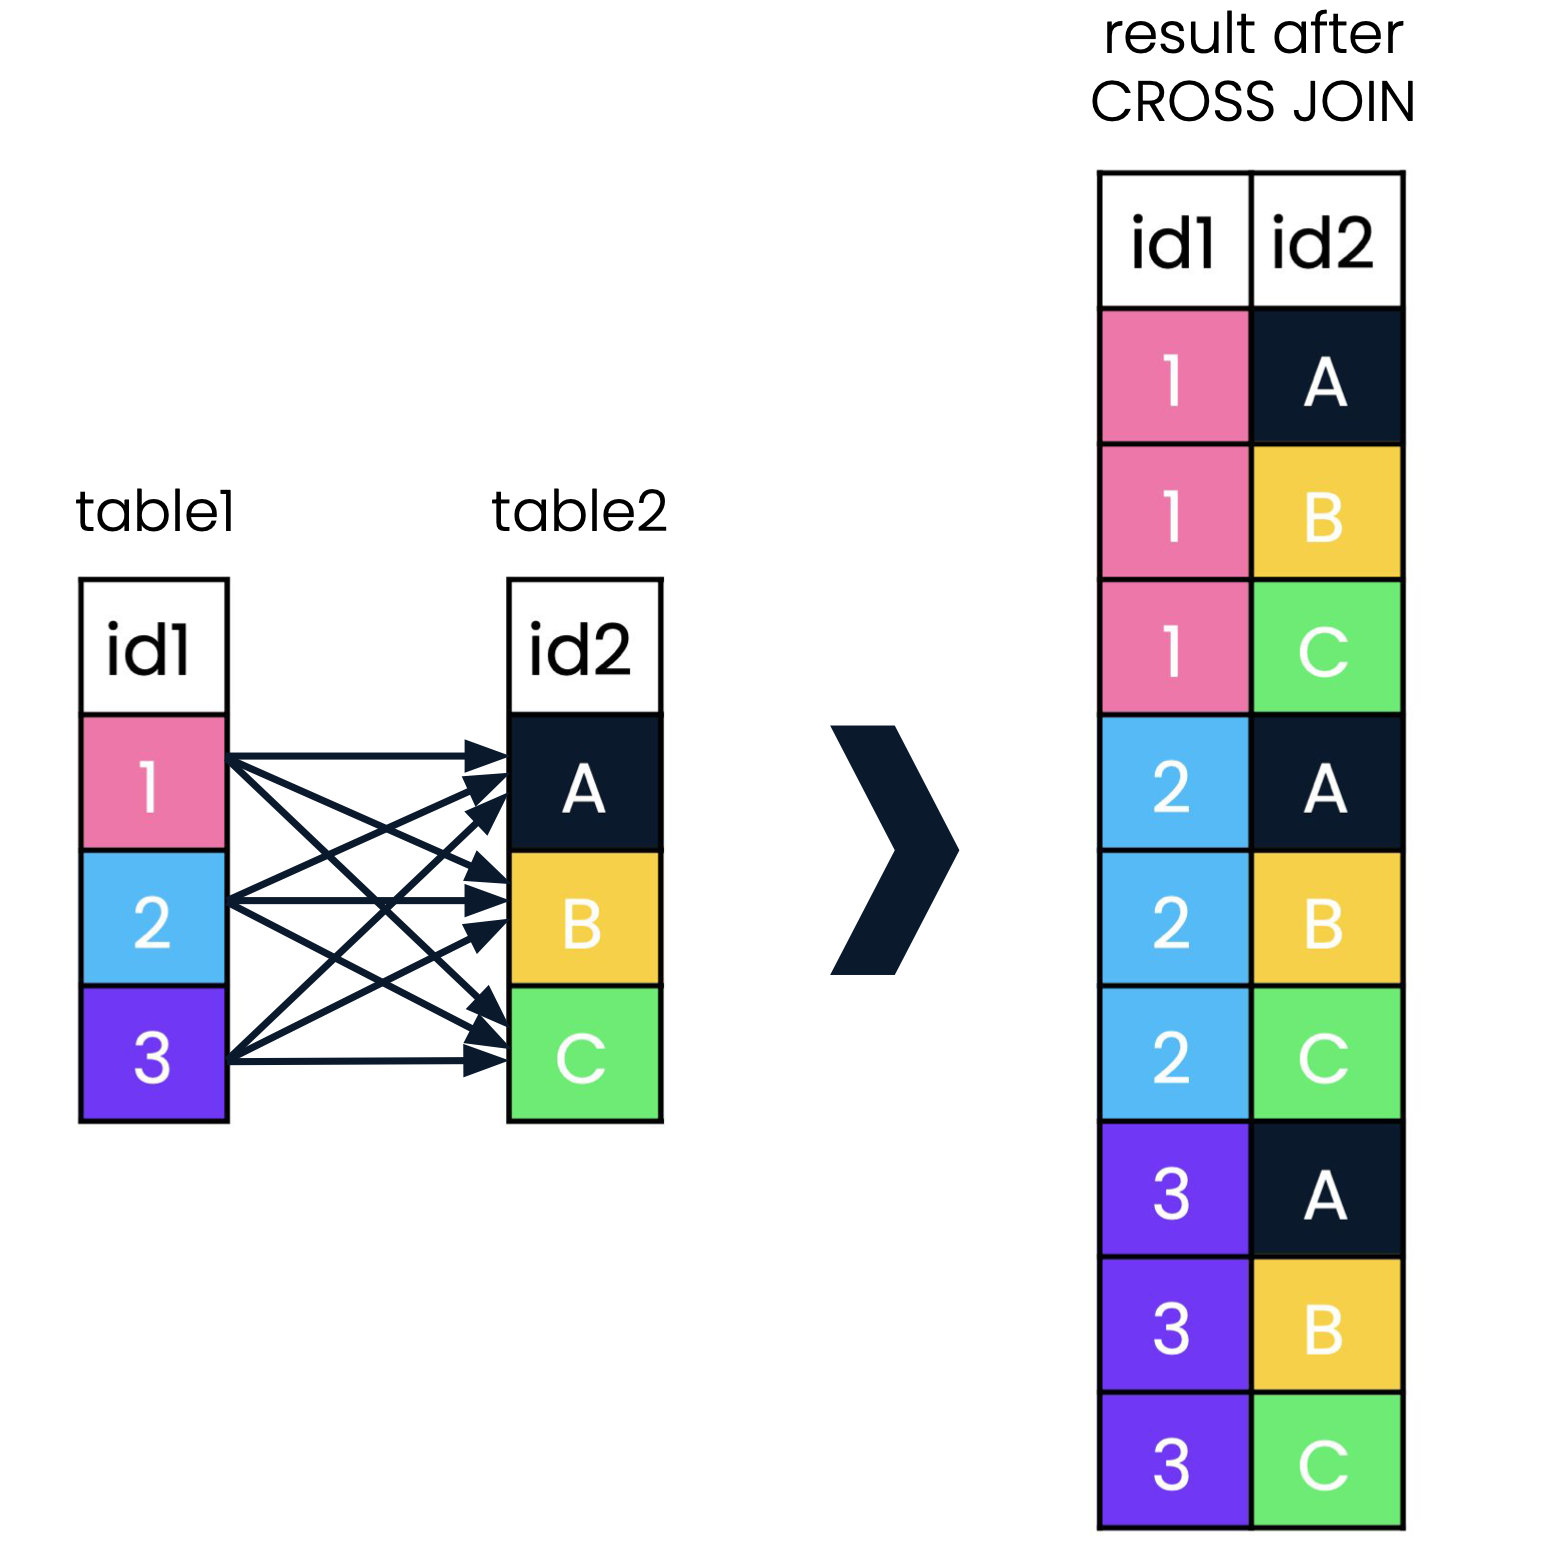

In [186]:
from IPython.display import Image
Image(filename = '/Users/mishudhar/Downloads/diagrams/cross_join.png', width = 600, height = 600)

# Cross Join is like the cross products between two sets. It provides all possible conditions.
the syntax is very minimal. We do not use any ON or USING command.

The metting between all the prime_ministers of Asia and all the presidents of Latin America.

In [188]:
%%sql
SELECT prime_minister, president
FROM prime_minister AS p1
CROSS JOIN presidents AS p2
WHERE p1.continent IN ('Asia')
    AND p2.continent IN ('South America')

 * sqlite:///jupyter_sql.db
Done.


[('Shehbaz Sharif', 'Gabriel Boric'),
 ('Shehbaz Sharif', 'Luis Lacalle Pou'),
 ('Narendra Modi', 'Gabriel Boric'),
 ('Narendra Modi', 'Luis Lacalle Pou'),
 ('Hassanal Bolkiah', 'Gabriel Boric'),
 ('Hassanal Bolkiah', 'Luis Lacalle Pou'),
 ('Haitham bin Tarik', 'Gabriel Boric'),
 ('Haitham bin Tarik', 'Luis Lacalle Pou')]

# To see what languages people speak in Pakistan and India

In [191]:
%%sql
SELECT c.name AS country, l.name AS language
FROM countries AS c
INNER JOIN languages AS l
USING(code)
WHERE c.code IN ('PAK', 'IND')
   AND l.code IN ('PAK', 'IND');

 * sqlite:///jupyter_sql.db
Done.


[('India', 'Assamese'),
 ('India', 'Bengali'),
 ('India', 'Gujarati'),
 ('India', 'Hindi'),
 ('India', 'Kannada'),
 ('India', 'Maithili'),
 ('India', 'Malayalam'),
 ('India', 'Marathi'),
 ('India', 'Oriya'),
 ('India', 'Other'),
 ('India', 'Punjabi'),
 ('India', 'Tamil'),
 ('India', 'Telugu'),
 ('India', 'Urdu'),
 ('Pakistan', 'Balochi'),
 ('Pakistan', 'Brahui'),
 ('Pakistan', 'Burushaski'),
 ('Pakistan', 'English'),
 ('Pakistan', 'Hindko'),
 ('Pakistan', 'Other'),
 ('Pakistan', 'Pashto'),
 ('Pakistan', 'Punjabi'),
 ('Pakistan', 'Saraiki'),
 ('Pakistan', 'Sindhi'),
 ('Pakistan', 'Urdu')]

# Now let's see how many languages their could have been if both countries were not seperated.
To see all the possible combinations we have to perform a corss join

In [193]:
%%sql
SELECT c.name AS country, l.name AS language
FROM countries AS c
CROSS JOIN languages AS l
WHERE c.code IN ('PAK', 'IND')
   AND l.code IN ('PAK', 'IND');

 * sqlite:///jupyter_sql.db
Done.


[('India', 'Hindi'),
 ('India', 'Bengali'),
 ('India', 'Telugu'),
 ('India', 'Marathi'),
 ('India', 'Tamil'),
 ('India', 'Urdu'),
 ('India', 'Gujarati'),
 ('India', 'Kannada'),
 ('India', 'Malayalam'),
 ('India', 'Oriya'),
 ('India', 'Punjabi'),
 ('India', 'Assamese'),
 ('India', 'Maithili'),
 ('India', 'Other'),
 ('India', 'Punjabi'),
 ('India', 'Sindhi'),
 ('India', 'Saraiki'),
 ('India', 'Pashto'),
 ('India', 'Urdu'),
 ('India', 'Balochi'),
 ('India', 'Hindko'),
 ('India', 'Brahui'),
 ('India', 'English'),
 ('India', 'Burushaski'),
 ('India', 'Other'),
 ('Pakistan', 'Hindi'),
 ('Pakistan', 'Bengali'),
 ('Pakistan', 'Telugu'),
 ('Pakistan', 'Marathi'),
 ('Pakistan', 'Tamil'),
 ('Pakistan', 'Urdu'),
 ('Pakistan', 'Gujarati'),
 ('Pakistan', 'Kannada'),
 ('Pakistan', 'Malayalam'),
 ('Pakistan', 'Oriya'),
 ('Pakistan', 'Punjabi'),
 ('Pakistan', 'Assamese'),
 ('Pakistan', 'Maithili'),
 ('Pakistan', 'Other'),
 ('Pakistan', 'Punjabi'),
 ('Pakistan', 'Sindhi'),
 ('Pakistan', 'Saraiki'),
 ('Pakistan', 'Pashto'),
 ('Pakistan', 'Urdu'),
 ('Pakistan', 'Balochi'),
 ('Pakistan', 'Hindko'),
 ('Pakistan', 'Brahui'),
 ('Pakistan', 'English'),
 ('Pakistan', 'Burushaski'),
 ('Pakistan', 'Other')]

We will determine the names of the five countries and their respective regions with the lowest life expectancy for the year 2010. We use our knowledge about joins, filtering, sorting and limiting to create this list!

In [201]:
%%sql
SELECT c.name AS country, region, life_expectancy AS life_exp
FROM countries AS c
INNER JOIN populations AS p
ON c.code = p.country_code
WHERE year = 2010
    
ORDER BY life_exp ASC
LIMIT 5;

 * sqlite:///jupyter_sql.db
Done.


[('Andorra', 'Southern Europe', None),
 ('American Samoa', 'Polynesia', None),
 ('Cayman Islands', 'Caribbean', None),
 ('Dominica', 'Caribbean', None),
 ('Gibraltar', 'Southern Europe', None)]

# Self joins
Self joins are used to compare values from of a table to other values from within the same table

Self joins have no dedicated syntax like other Joins.

Suppose all ministers are convening summits on their own continents. Is it possible to find out all combinations between the PM of the same continent by using Self JOIN.

In [202]:
%%sql
SELECT p1.country As country1, p2.country AS country2, p1.continent
FROM prime_minister AS p1
INNER JOIN prime_minister AS p2
ON p1.continent = p2.continent
LIMIT 10;

 * sqlite:///jupyter_sql.db
Done.


[('Egypt', 'Egypt', 'Africa'),
 ('Portugal', 'Norway', 'Europe'),
 ('Portugal', 'Portugal', 'Europe'),
 ('Portugal', 'United Kingdom', 'Europe'),
 ('Pakistan', 'Brunei', 'Asia'),
 ('Pakistan', 'India', 'Asia'),
 ('Pakistan', 'Oman', 'Asia'),
 ('Pakistan', 'Pakistan', 'Asia'),
 ('United Kingdom', 'Norway', 'Europe'),
 ('United Kingdom', 'Portugal', 'Europe')]

There are some identical values like Portugal Portugal Europe. To drop those

In [203]:
%%sql
SELECT p1.country As country1, p2.country AS country2, p1.continent
FROM prime_minister AS p1
INNER JOIN prime_minister AS p2
ON p1.continent = p2.continent
   AND p1.country <> p2.country
LIMIT 10;

 * sqlite:///jupyter_sql.db
Done.


[('Portugal', 'Norway', 'Europe'),
 ('Portugal', 'United Kingdom', 'Europe'),
 ('Pakistan', 'Brunei', 'Asia'),
 ('Pakistan', 'India', 'Asia'),
 ('Pakistan', 'Oman', 'Asia'),
 ('United Kingdom', 'Norway', 'Europe'),
 ('United Kingdom', 'Portugal', 'Europe'),
 ('India', 'Brunei', 'Asia'),
 ('India', 'Oman', 'Asia'),
 ('India', 'Pakistan', 'Asia')]

Have a look on the populations table. Suppose, we wan to see how much the populations changed in 2010 and 2015

In [211]:
%%sql
SELECT p1.country_code, p1.size AS size2010, p2.size AS size2015
FROM populations AS p1
INNER JOIN populations AS p2
ON p1.country_code = p2.country_code
WHERE p1.year = 2010
AND p2.year = 2015
AND p1.year = p2.year - 5;

 * sqlite:///jupyter_sql.db
Done.


[('ABW', 101597.0, 103889.0),
 ('AFG', 27962207.0, 32526562.0),
 ('AGO', 21219954.0, 25021974.0),
 ('ALB', 2913021.0, 2889167.0),
 ('AND', 84419.0, 70473.0),
 ('ARE', 8329453.0, 9156963.0),
 ('ARG', 41222875.0, 43416755.0),
 ('ARM', 2963496.0, 3017712.0),
 ('ASM', 55636.0, 55538.0),
 ('ATG', 87233.0, 91818.0),
 ('AUS', 22031750.0, 23789752.0),
 ('AUT', 8363404.0, 8638366.0),
 ('AZE', 9054332.0, 9649341.0),
 ('BDI', 9461117.0, 11178921.0),
 ('BEL', 10895586.0, 11249420.0),
 ('BEN', 9509798.0, 10879829.0),
 ('BFA', 15632066.0, 18105570.0),
 ('BGD', 151616777.0, 160995642.0),
 ('BGR', 7395599.0, 7177991.0),
 ('BHR', 1261319.0, 1377237.0),
 ('BHS', 360830.0, 388019.0),
 ('BIH', 3835258.0, 3810416.0),
 ('BLR', 9490583.0, 9489616.0),
 ('BLZ', 321609.0, 359287.0),
 ('BMU', 65124.0, 65235.0),
 ('BOL', 9918245.0, 10724705.0),
 ('BRA', 198614208.0, 207847528.0),
 ('BRB', 279566.0, 284215.0),
 ('BRN', 393302.0, 423188.0),
 ('BTN', 720246.0, 774830.0),
 ('BWA', 2047831.0, 2262485.0),
 ('CAF', 4444973.0, 4900274.0),
 ('CAN', 34005274.0, 35848610.0),
 ('CHE', 7824909.0, 8281430.0),
 ('CHI', 159583.0, 163692.0),
 ('CHL', 17015048.0, 17948141.0),
 ('CHN', 1337705000.0, 1371220000.0),
 ('CIV', 20131707.0, 22701556.0),
 ('CMR', 20590666.0, 23344179.0),
 ('COD', 65938712.0, 77266814.0),
 ('COG', 4066078.0, 4620330.0),
 ('COL', 45918101.0, 48228704.0),
 ('COM', 698695.0, 788474.0),
 ('CPV', 490379.0, 520502.0),
 ('CRI', 4545273.0, 4807850.0),
 ('CUB', 11308133.0, 11389562.0),
 ('CUW', 148703.0, 157979.0),
 ('CYM', 55509.0, 59967.0),
 ('CYP', 1103685.0, 1165300.0),
 ('CZE', 10474410.0, 10546059.0),
 ('DEU', 81776930.0, 81679769.0),
 ('DJI', 830802.0, 887861.0),
 ('DMA', 71167.0, 72680.0),
 ('DNK', 5547683.0, 5683483.0),
 ('DOM', 9897983.0, 10528391.0),
 ('DZA', 36036159.0, 39666519.0),
 ('ECU', 14934692.0, 16144363.0),
 ('EGY', 82040994.0, 91508084.0),
 ('ERI', 4689664.0, None),
 ('ESP', 46576897.0, 46443994.0),
 ('EST', 1331475.0, 1314608.0),
 ('ETH', 87561814.0, 99390750.0),
 ('FIN', 5363352.0, 5479531.0),
 ('FJI', 859952.0, 892145.0),
 ('FRA', 65027512.0, 66538391.0),
 ('FRO', 48567.0, 48199.0),
 ('FSM', 103619.0, 104460.0),
 ('GAB', 1541936.0, 1725292.0),
 ('GBR', 62766365.0, 65128861.0),
 ('GEO', 3926000.0, 3717100.0),
 ('GHA', 24317734.0, 27409893.0),
 ('GIB', 30732.0, 32217.0),
 ('GIN', 11012406.0, 12608590.0),
 ('GMB', 1693002.0, 1990924.0),
 ('GNB', 1634196.0, 1844325.0),
 ('GNQ', 728710.0, 845060.0),
 ('GRC', 11121341.0, 10820883.0),
 ('GRD', 104677.0, 106825.0),
 ('GRL', 56905.0, 56114.0),
 ('GTM', 14732261.0, 16342897.0),
 ('GUM', 159440.0, 169885.0),
 ('GUY', 753362.0, 767085.0),
 ('HKG', 7024200.0, 7305700.0),
 ('HND', 7503875.0, 8075060.0),
 ('HRV', 4417781.0, 4203604.0),
 ('HTI', 9999617.0, 10711067.0),
 ('HUN', 10000023.0, 9843028.0),
 ('IDN', 241613126.0, 257563815.0),
 ('IMN', 84327.0, 87780.0),
 ('IND', 1230984504.0, 1311050527.0),
 ('IRL', 4560155.0, 4643740.0),
 ('IRN', 74253373.0, 79109272.0),
 ('IRQ', 30868156.0, 36423395.0),
 ('ISL', 318041.0, 330815.0),
 ('ISR', 7623600.0, 8380100.0),
 ('ITA', 59277417.0, 60730582.0),
 ('JAM', 2741253.0, 2793335.0),
 ('JOR', 6517912.0, 7594547.0),
 ('JPN', 128070000.0, 126958472.0),
 ('KAZ', 16321581.0, 17544126.0),
 ('KEN', 40328313.0, 46050302.0),
 ('KGZ', 5447900.0, 5956900.0),
 ('KHM', 14363586.0, 15577899.0),
 ('KIR', 102648.0, 112423.0),
 ('KNA', 52352.0, 55572.0),
 ('KOR', 49410366.0, 50617045.0),
 ('KWT', 3059473.0, 3892115.0),
 ('LAO', 6260544.0, 6802023.0),
 ('LBN', 4337156.0, 5850743.0),
 ('LBR', 3957990.0, 4503438.0),
 ('LBY', 6265697.0, 6278438.0),
 ('LCA', 177397.0, 184999.0),
 ('LIE', 36276.0, 37531.0),
 ('LKA', 20119000.0, 20966000.0),
 ('LSO', 2010586.0, 2135022.0),
 ('LTU', 3097282.0, 2904910.0),
 ('LUX', 506953.0, 569604.0),
 ('LVA', 2097555.0, 1977527.0),
 ('MAC', 534626.0, 587606.0),
 ('MAF', 30235.0, 31754.0),
 ('MAR', 32107739.0, 34377511.0),
 ('MCO', 36845.0, 37731.0),
 ('MDA', 3562045.0, 3554108.0),
 ('MDG', 21079532.0, 24235390.0),
 ('MDV', 367000.0, 409163.0),
 

# Set operations

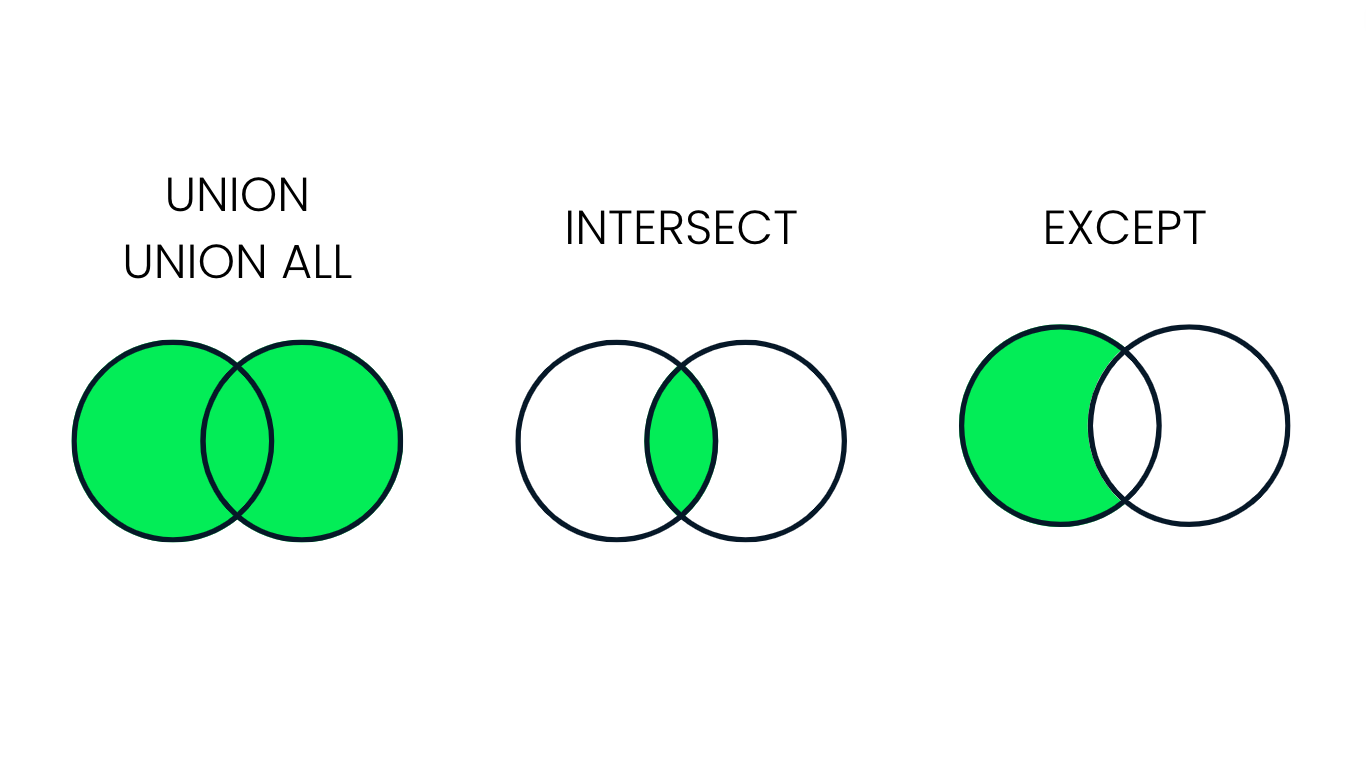

In [212]:
from IPython.display import Image
Image(filename = '/Users/mishudhar/Downloads/diagrams/venn.png', width = 600, height = 600)

# UNION

select *

from left_table

UNION

select *

from right_table;


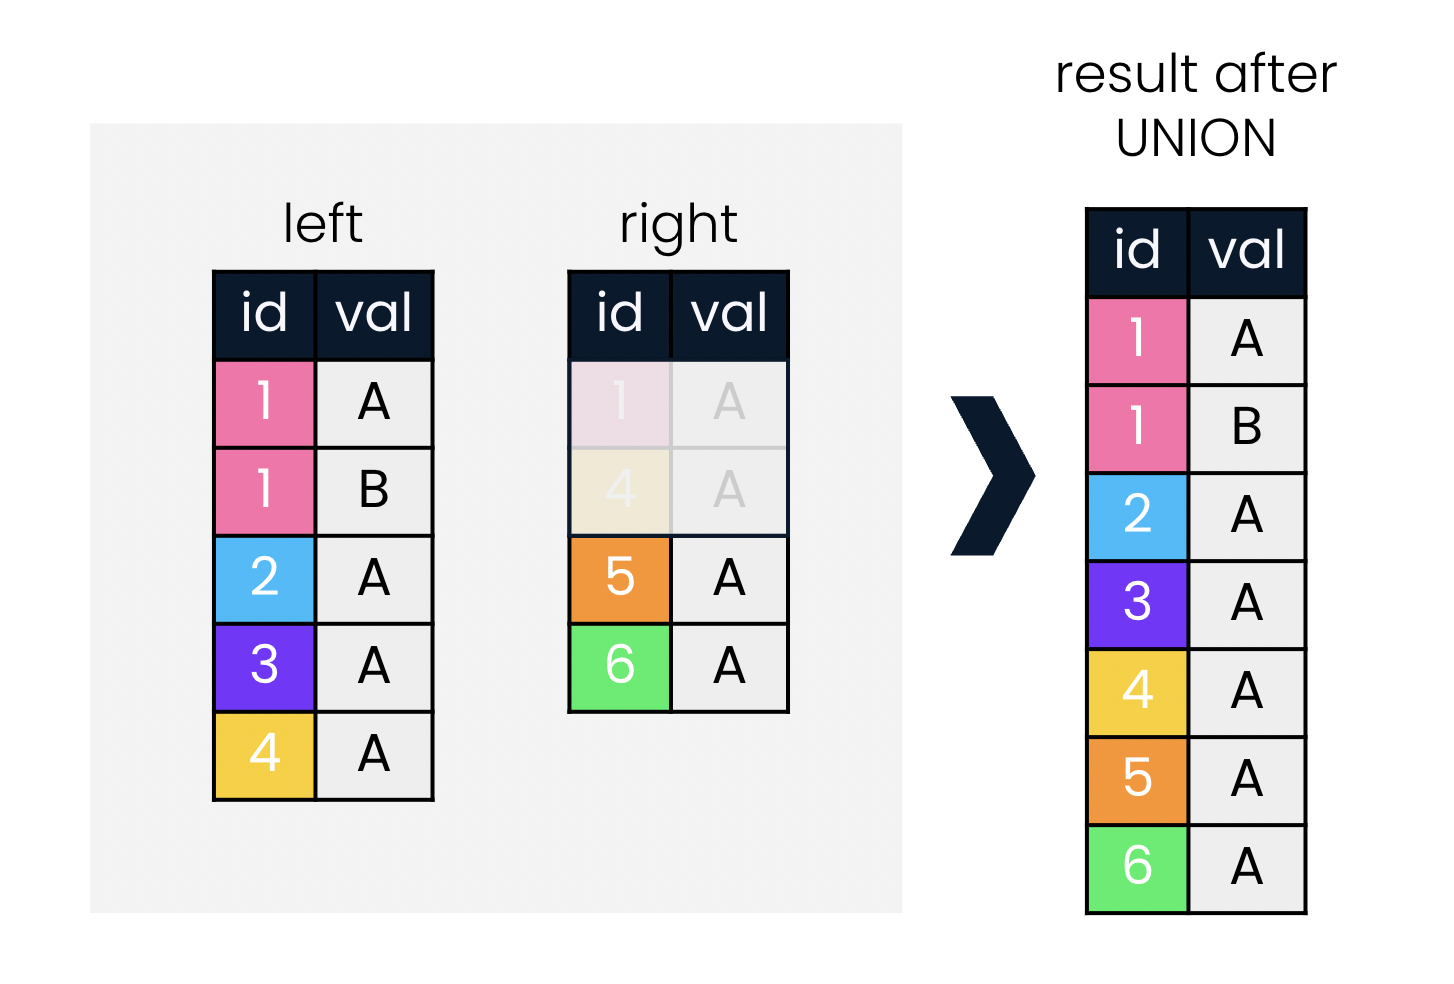

In [213]:
from IPython.display import Image
Image(filename = '/Users/mishudhar/Downloads/diagrams/union.png', width = 600, height = 600)

# UNION ALL

select *

from left_table

UNION ALL

select *

from right_table;

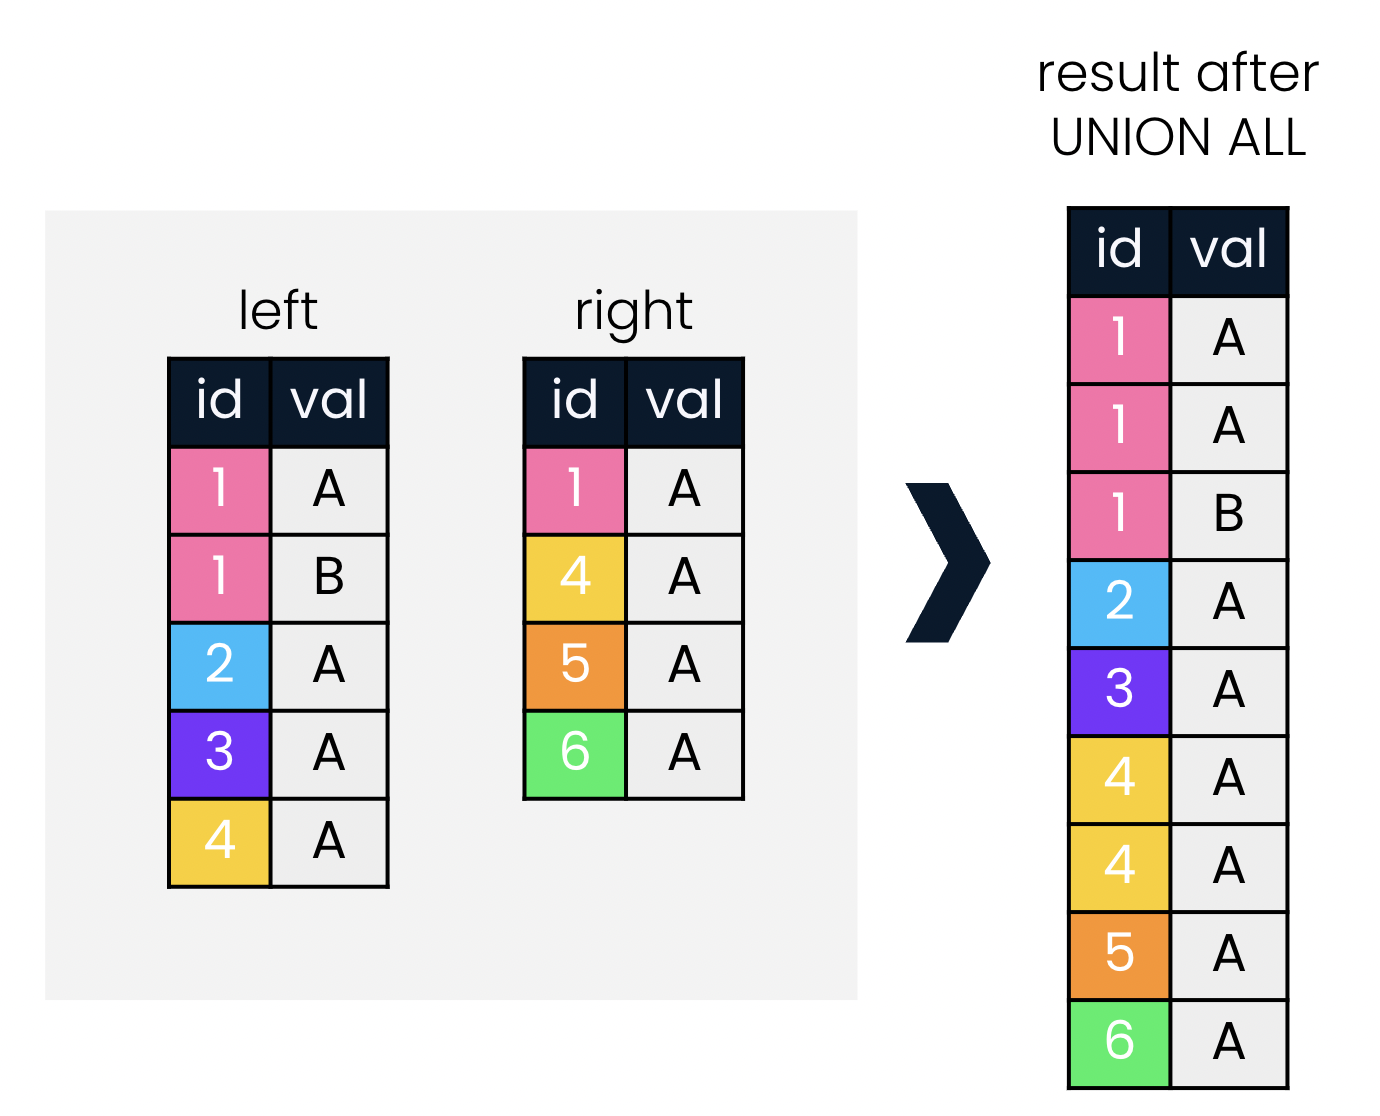

In [214]:
Image(filename = '/Users/mishudhar/Downloads/diagrams/union_all.png', width = 600, height = 600)

# Important note about set operations
1. For all set operations the number of selected columns and their respective data types must be identical
2. For instance we can't stack a number field on top of a character field

In [216]:
%%sql
SELECT monarch AS leader, country
FROM monarchs
UNION 
SELECT prime_minister, country
FROM prime_minister
ORDER BY country, leader


 * sqlite:///jupyter_sql.db
Done.


[('Scott Morrison', 'Australia'),
 ('Hassanal Bolkiah', 'Brunei'),
 ('Mostafa Madbouly', 'Egypt'),
 ('Narendra Modi', 'India'),
 ('Jacinda Ardern', 'New Zealand'),
 ('Harald V', 'Norway'),
 ('Jonas Gahr Støre', 'Norway'),
 ('Haitham bin Tarik', 'Oman'),
 ('Shehbaz Sharif', 'Pakistan'),
 ('António Costa', 'Portugal'),
 ('Boris Johnson', 'United Kingdom'),
 ('Queen Elizabeth II', 'United Kingdom')]

Does something stand out here? Oman has shown as one time only but we know that prime_minister and monarch of the Oman is the same person. In this case UNION ALL helps because it includes all records.

In [217]:
%%sql
SELECT monarch AS leader, country
FROM monarchs
UNION ALL
SELECT prime_minister, country
FROM prime_minister
ORDER BY country, leader;

 * sqlite:///jupyter_sql.db
Done.


[('Scott Morrison', 'Australia'),
 ('Hassanal Bolkiah', 'Brunei'),
 ('Hassanal Bolkiah', 'Brunei'),
 ('Mostafa Madbouly', 'Egypt'),
 ('Narendra Modi', 'India'),
 ('Jacinda Ardern', 'New Zealand'),
 ('Harald V', 'Norway'),
 ('Jonas Gahr Støre', 'Norway'),
 ('Haitham bin Tarik', 'Oman'),
 ('Haitham bin Tarik', 'Oman'),
 ('Shehbaz Sharif', 'Pakistan'),
 ('António Costa', 'Portugal'),
 ('Boris Johnson', 'United Kingdom'),
 ('Queen Elizabeth II', 'United Kingdom')]

In this exercise, you have two tables, economies2015 and economies2019, available to you under the tabs in the console. You'll perform a set operation to stack all records in these two tables on top of each other, excluding duplicates.

In [219]:
%%sql
SELECT *
FROM economies2015
UNION
SELECT *
FROM economies2019
ORDER BY code, year;

 * sqlite:///jupyter_sql.db
Done.


[(0, 'ABW', 2015, 'High income', 14.86785151),
 (1, 'AGO', 2015, 'Lower middle income', 25.02132654),
 (0, 'AGO', 2019, 'Lower middle income', 25.52484772),
 (2, 'ALB', 2015, 'Upper middle income', 16.8639814),
 (1, 'ALB', 2019, 'Upper middle income', 14.4998255),
 (3, 'ARG', 2015, 'Upper middle income', 14.28730262),
 (2, 'ARG', 2019, 'Upper middle income', 14.28529512),
 (4, 'ARM', 2015, 'Upper middle income', 18.43038559),
 (3, 'ARM', 2019, 'Upper middle income', 9.815573922),
 (5, 'ATG', 2015, 'High income', 7.051264504),
 (4, 'ATG', 2019, 'High income', 26.38342703),
 (6, 'AUS', 2015, 'High income', 22.70271367),
 (5, 'AUS', 2019, 'High income', 22.52853371),
 (7, 'AUT', 2015, 'High income', 25.65331339),
 (6, 'AUT', 2019, 'High income', 27.75799005),
 (8, 'AZE', 2015, 'Upper middle income', 28.12191969),
 (7, 'AZE', 2019, 'Upper middle income', 28.57354797),
 (9, 'BDI', 2015, 'Low income', 11.22352302),
 (10, 'BEL', 2015, 'High income', 25.00867822),
 (8, 'BEL', 2019, 'High income', 25.09256403),
 (11, 'BEN', 2015, 'Lower middle income', 13.86203006),
 (9, 'BEN', 2019, 'Lower middle income', 21.71942726),
 (12, 'BFA', 2015, 'Low income', 11.85934408),
 (10, 'BFA', 2019, 'Low income', 16.86677862),
 (13, 'BGD', 2015, 'Lower middle income', 36.73376986),
 (11, 'BGD', 2019, 'Lower middle income', 35.72906731),
 (14, 'BGR', 2015, 'Upper middle income', 22.19285141),
 (12, 'BGR', 2019, 'Upper middle income', 24.2889721),
 (15, 'BHR', 2015, 'High income', 23.59933328),
 (16, 'BHS', 2015, 'High income', 20.76599826),
 (13, 'BHS', 2019, 'High income', 20.00181885),
 (17, 'BIH', 2015, 'Upper middle income', 11.00677569),
 (14, 'BIH', 2019, 'Upper middle income', 19.17116997),
 (18, 'BLR', 2015, 'Upper middle income', 28.9087752),
 (15, 'BLR', 2019, 'Upper middle income', 27.82238987),
 (19, 'BLZ', 2015, 'Lower middle income', 13.1532771),
 (16, 'BLZ', 2019, 'Lower middle income', 15.01743523),
 (20, 'BMU', 2015, 'High income', 39.94720496),
 (17, 'BMU', 2019, 'High income', 39.1734617),
 (21, 'BOL', 2015, 'Lower middle income', 14.21692552),
 (18, 'BOL', 2019, 'Lower middle income', 14.11479252),
 (22, 'BRA', 2015, 'Upper middle income', 14.52934719),
 (19, 'BRA', 2019, 'Upper middle income', 12.5423269),
 (23, 'BRB', 2015, 'High income', 5.338419246),
 (24, 'BRN', 2015, 'High income', 57.11833733),
 (20, 'BRN', 2019, 'High income', 53.55344169),
 (25, 'BTN', 2015, 'Lower middle income', 23.39981019),
 (21, 'BTN', 2019, 'Lower middle income', 21.37668783),
 (26, 'BWA', 2015, 'Upper middle income', 36.40472153),
 (22, 'BWA', 2019, 'Upper middle income', 30.99518982),
 (27, 'CAN', 2015, 'High income', 19.56936363),
 (23, 'CAN', 2019, 'High income', 20.01542161),
 (28, 'CHE', 2015, 'High income', 35.83819318),
 (24, 'CHE', 2019, 'High income', 31.86302307),
 (29, 'CHL', 2015, 'High income', 21.29965345),
 (25, 'CHL', 2019, 'High income', 19.20627011),
 (30, 'CHN', 2015, 'Upper middle income', 45.41758655),
 (26, 'CHN', 2019, 'Upper middle income', 43.77302796),
 (31, 'CIV', 2015, 'Lower middle income', 22.52951586),
 (27, 'CIV', 2019, 'Lower middle income', 17.55413939),
 (32, 'CMR', 2015, 'Lower middle income', 14.31569394),
 (28, 'CMR', 2019, 'Lower middle income', 14.39895778),
 (33, 'COD', 2015, 'Low income', 13.34708291),
 (29, 'COD', 2019, 'Low income', 17.5043216),
 (34, 'COG', 2015, 'Lower middle income', 40.45683662),
 (35, 'COL', 2015, 'Upper middle income', 17.27934453),
 (30, 'COL', 2019, 'Upper middle income', 16.15447891),
 (36, 'COM', 2015, 'Lower middle income', 13.35659827),
 (31, 'COM', 2019, 'Lower middle income', 8.144416911),
 (37, 'CPV', 2015, 'Lower middle income', 28.15598428),
 (32, 'CPV', 2019, 'Lower middle income', 35.24677401),
 (38, 'CRI', 2015, 'Upper middle income', 14.62254549),
 (33, 'CRI', 2019, 'Upper middle income', 13.48276256),
 (39, 'CUW', 2015, 'High income', 20.01322584),
 (40, 'CYP', 2015, 'High income', 13.23105533),
 (34, 'CYP', 2019, 'High income', 14.62757465),
 (41, 'CZE', 2015, 'High 

In [220]:
%%sql
SELECT code, year
FROM economies
UNION ALL
SELECT country_code, year
FROM populations
ORDER BY code, year;

 * sqlite:///jupyter_sql.db
Done.


[('ABW', 2010),
 ('ABW', 2015),
 ('AFG', 2010),
 ('AFG', 2010),
 ('AFG', 2015),
 ('AFG', 2015),
 ('AGO', 2010),
 ('AGO', 2010),
 ('AGO', 2015),
 ('AGO', 2015),
 ('ALB', 2010),
 ('ALB', 2010),
 ('ALB', 2015),
 ('ALB', 2015),
 ('AND', 2010),
 ('AND', 2015),
 ('ARE', 2010),
 ('ARE', 2010),
 ('ARE', 2015),
 ('ARE', 2015),
 ('ARG', 2010),
 ('ARG', 2010),
 ('ARG', 2015),
 ('ARG', 2015),
 ('ARM', 2010),
 ('ARM', 2010),
 ('ARM', 2015),
 ('ARM', 2015),
 ('ASM', 2010),
 ('ASM', 2015),
 ('ATG', 2010),
 ('ATG', 2010),
 ('ATG', 2015),
 ('ATG', 2015),
 ('AUS', 2010),
 ('AUS', 2010),
 ('AUS', 2015),
 ('AUS', 2015),
 ('AUT', 2010),
 ('AUT', 2010),
 ('AUT', 2015),
 ('AUT', 2015),
 ('AZE', 2010),
 ('AZE', 2010),
 ('AZE', 2015),
 ('AZE', 2015),
 ('BDI', 2010),
 ('BDI', 2010),
 ('BDI', 2015),
 ('BDI', 2015),
 ('BEL', 2010),
 ('BEL', 2010),
 ('BEL', 2015),
 ('BEL', 2015),
 ('BEN', 2010),
 ('BEN', 2010),
 ('BEN', 2015),
 ('BEN', 2015),
 ('BFA', 2010),
 ('BFA', 2010),
 ('BFA', 2015),
 ('BFA', 2015),
 ('BGD', 2010),
 ('BGD', 2010),
 ('BGD', 2015),
 ('BGD', 2015),
 ('BGR', 2010),
 ('BGR', 2010),
 ('BGR', 2015),
 ('BGR', 2015),
 ('BHR', 2010),
 ('BHR', 2010),
 ('BHR', 2015),
 ('BHR', 2015),
 ('BHS', 2010),
 ('BHS', 2010),
 ('BHS', 2015),
 ('BHS', 2015),
 ('BIH', 2010),
 ('BIH', 2010),
 ('BIH', 2015),
 ('BIH', 2015),
 ('BLR', 2010),
 ('BLR', 2010),
 ('BLR', 2015),
 ('BLR', 2015),
 ('BLZ', 2010),
 ('BLZ', 2010),
 ('BLZ', 2015),
 ('BLZ', 2015),
 ('BMU', 2010),
 ('BMU', 2015),
 ('BOL', 2010),
 ('BOL', 2010),
 ('BOL', 2015),
 ('BOL', 2015),
 ('BRA', 2010),
 ('BRA', 2010),
 ('BRA', 2015),
 ('BRA', 2015),
 ('BRB', 2010),
 ('BRB', 2010),
 ('BRB', 2015),
 ('BRB', 2015),
 ('BRN', 2010),
 ('BRN', 2010),
 ('BRN', 2015),
 ('BRN', 2015),
 ('BTN', 2010),
 ('BTN', 2010),
 ('BTN', 2015),
 ('BTN', 2015),
 ('BWA', 2010),
 ('BWA', 2010),
 ('BWA', 2015),
 ('BWA', 2015),
 ('CAF', 2010),
 ('CAF', 2010),
 ('CAF', 2015),
 ('CAF', 2015),
 ('CAN', 2010),
 ('CAN', 2010),
 ('CAN', 2015),
 ('CAN', 2015),
 ('CHE', 2010),
 ('CHE', 2010),
 ('CHE', 2015),
 ('CHE', 2015),
 ('CHI', 2010),
 ('CHI', 2015),
 ('CHL', 2010),
 ('CHL', 2010),
 ('CHL', 2015),
 ('CHL', 2015),
 ('CHN', 2010),
 ('CHN', 2010),
 ('CHN', 2015),
 ('CHN', 2015),
 ('CIV', 2010),
 ('CIV', 2010),
 ('CIV', 2015),
 ('CIV', 2015),
 ('CMR', 2010),
 ('CMR', 2010),
 ('CMR', 2015),
 ('CMR', 2015),
 ('COD', 2010),
 ('COD', 2010),
 ('COD', 2015),
 ('COD', 2015),
 ('COG', 2010),
 ('COG', 2010),
 ('COG', 2015),
 ('COG', 2015),
 ('COL', 2010),
 ('COL', 2010),
 ('COL', 2015),
 ('COL', 2015),
 ('COM', 2010),
 ('COM', 2010),
 ('COM', 2015),
 ('COM', 2015),
 ('CPV', 2010),
 ('CPV', 2010),
 ('CPV', 2015),
 ('CPV', 2015),
 ('CRI', 2010),
 ('CRI', 2010),
 ('CRI', 2015),
 ('CRI', 2015),
 ('CUB', 2010),
 ('CUB', 2015),
 ('CUW', 2010),
 ('CUW', 2015),
 ('CYM', 2010),
 ('CYM', 2015),
 ('CYP', 2010),
 ('CYP', 2010),
 ('CYP', 2015),
 ('CYP', 2015),
 ('CZE', 2010),
 ('CZE', 2010),
 ('CZE', 2015),
 ('CZE', 2015),
 ('DEU', 2010),
 ('DEU', 2010),
 ('DEU', 2015),
 ('DEU', 2015),
 ('DJI', 2010),
 ('DJI', 2010),
 ('DJI', 2015),
 ('DJI', 2015),
 ('DMA', 2010),
 ('DMA', 2010),
 ('DMA', 2015),
 ('DMA', 2015),
 ('DNK', 2010),
 ('DNK', 2010),
 ('DNK', 2015),
 ('DNK', 2015),
 ('DOM', 2010),
 ('DOM', 2010),
 ('DOM', 2015),
 ('DOM', 2015),
 ('DZA', 2010),
 ('DZA', 2010),
 ('DZA', 2015),
 ('DZA', 2015),
 ('ECU', 2010),
 ('ECU', 2010),
 ('ECU', 2015),
 ('ECU', 2015),
 ('EGY', 2010),
 ('EGY', 2010),
 ('EGY', 2015),
 ('EGY', 2015),
 ('ERI', 2010),
 ('ERI', 2010),
 ('ERI', 2015),
 ('ERI', 2015),
 ('ESP', 2010),
 ('ESP', 2010),
 ('ESP', 2015),
 ('ESP', 2015),
 ('EST', 2010),
 ('EST', 2010),
 ('EST', 2015),
 ('EST', 2015),
 ('ETH', 2010),
 ('ETH', 2010),
 ('ETH', 2015),
 ('ETH', 2015),
 ('FIN', 2010),
 ('FIN', 2010),
 ('FIN', 2015),
 ('FIN', 2015),
 ('FJI', 2010),
 ('FJI', 2010),
 ('FJI', 2015),
 ('FJI', 2015),
 ('FRA', 2010),
 ('FRA', 2010),
 ('FRA', 2015),
 ('FRA', 2015),
 ('FRO', 2010),
 ('FRO', 2015),
 ('FSM', 2010),
 ('FSM', 2010),
 ('FSM', 2015),
 ('FSM', 2015),


In this exercise, you have two tables, economies2015 and economies2019, available to you under the tabs in the console. You'll perform a set operation to stack all records in these two tables on top of each other, excluding duplicates.

# INTERSECT

Intersect returns only those records where all the values are same

select id, val

from left_table

intersect

select id, val

from right_table;

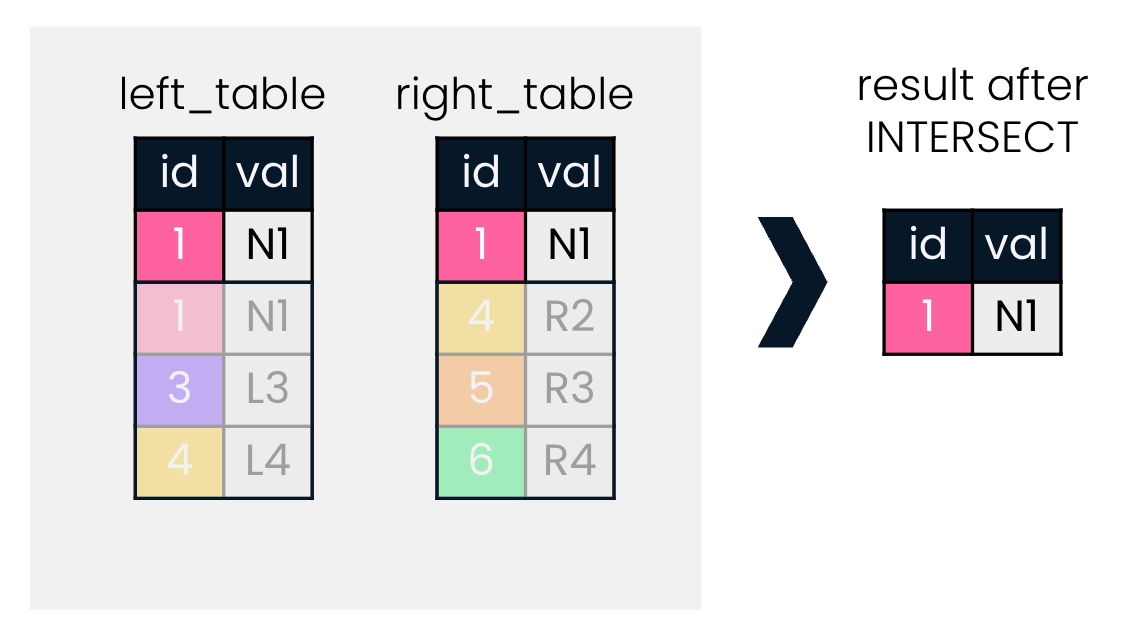

In [221]:
Image(filename = '/Users/mishudhar/Downloads/diagrams/intersect_two_columns.png', height = 600, width = 600)

select countries that have both prime ministers and presidents

In [223]:
%%sql
SELECT country AS intersect_country
FROM prime_minister
INTERSECT
SELECT country
FROM presidents;

 * sqlite:///jupyter_sql.db
Done.


[('Egypt',), ('India',), ('Pakistan',), ('Portugal',)]

These are the four countries that have both prime minister and president.

# Intersect on two fields
Intersect on country and prime_minister instead of only country

In [225]:
%%sql
SELECT country, prime_minister AS leader
FROM prime_minister
INTERSECT
SELECT country, president
FROM presidents;

 * sqlite:///jupyter_sql.db
Done.


[]

This code will give an empty table. Because all the prime_ministers and presidenrs do not share the same name. Let's have a look on the monarchs table

In [227]:
%%sql
SELECT country, prime_minister AS leader
FROM prime_minister
INTERSECT
SELECT country, monarch
FROM monarchs;


 * sqlite:///jupyter_sql.db
Done.


[('Brunei', 'Hassanal Bolkiah'), ('Oman', 'Haitham bin Tarik')]

Now we get two records. Beacuse in Oman and Brunei have the same monarchs as PM and president.

# Except
It retains only records from the left table that are not present in the right table.

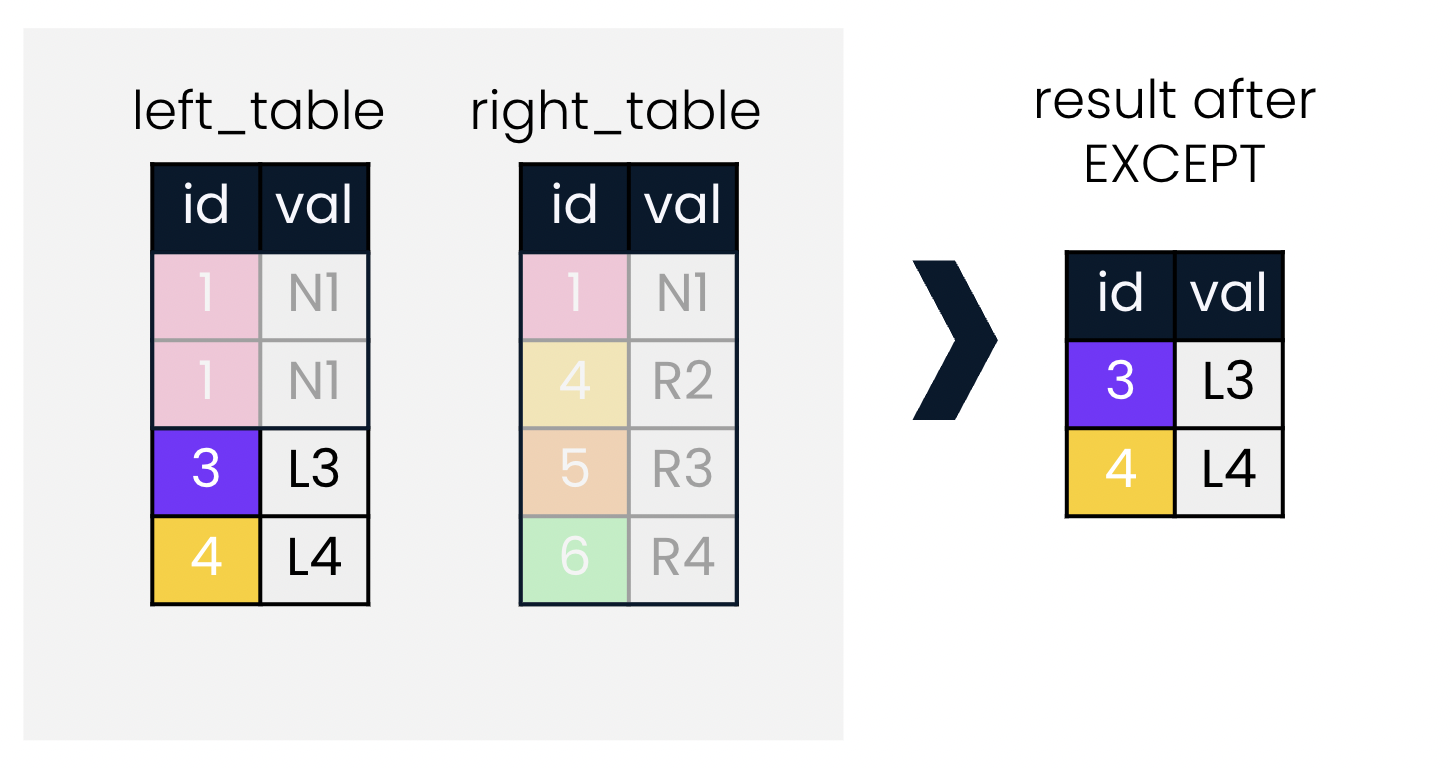

In [229]:
Image(filename = '/Users/mishudhar/Downloads/diagrams/except.png', height = 600, width = 600)

Let's see we want to see the monarchs that do not hold the terms prime ministers.

In [230]:
%%sql
SELECT country, monarch
FROM monarchs
EXCEPT 
SELECT country, prime_minister
FROM prime_minister;

 * sqlite:///jupyter_sql.db
Done.


[('Norway', 'Harald V'), ('United Kingdom', 'Queen Elizabeth II')]

Name of cities that do not have the same name as country

In [234]:
%%sql
SELECT name
FROM cities
EXCEPT
SELECT name
FROM countries
ORDER BY name;

 * sqlite:///jupyter_sql.db
Done.


[('Abidjan',),
 ('Abu Dhabi',),
 ('Abuja',),
 ('Accra',),
 ('Addis Ababa',),
 ('Ahmedabad',),
 ('Alexandria',),
 ('Algiers',),
 ('Almaty',),
 ('Ankara',),
 ('Auckland',),
 ('Baghdad',),
 ('Baku',),
 ('Bandung',),
 ('Bangkok',),
 ('Barcelona',),
 ('Barranquilla',),
 ('Basra',),
 ('Beijing',),
 ('Belo Horizonte',),
 ('Bengaluru',),
 ('Berlin',),
 ('Bhopal',),
 ('Birmingham',),
 ('Bogota',),
 ('Brasilia',),
 ('Brazzaville',),
 ('Brisbane',),
 ('Bucharest',),
 ('Budapest',),
 ('Buenos Aires',),
 ('Busan',),
 ('Cairo',),
 ('Calgary',),
 ('Cali',),
 ('Caloocan',),
 ('Campinas',),
 ('Cape Town',),
 ('Caracas',),
 ('Casablanca',),
 ('Changchun',),
 ('Changsha',),
 ('Chaozhou',),
 ('Chengdu',),
 ('Chennai',),
 ('Chicago',),
 ('Chittagong',),
 ('Chongqing',),
 ('Cologne',),
 ('Cordoba',),
 ('Curitiba',),
 ('Daegu',),
 ('Daejeon',),
 ('Dakar',),
 ('Dalian',),
 ('Dallas',),
 ('Dar es Salaam',),
 ('Davao City',),
 ('Delhi',),
 ('Dhaka',),
 ('Dongguan',),
 ('Douala',),
 ('Dubai',),
 ('Durban',),
 ('Ekurhuleni',),
 ('Faisalabad',),
 ('Fez',),
 ('Fortaleza',),
 ('Foshan',),
 ('Fukuoka',),
 ('Fuzhou',),
 ('Giza',),
 ('Guadalajara',),
 ('Guangzhou',),
 ('Guatemala City',),
 ('Guayaquil',),
 ('Gujranwala',),
 ('Hamburg',),
 ('Hangzhou',),
 ('Hanoi',),
 ('Harare',),
 ('Harbin',),
 ('Havana',),
 ('Hefei',),
 ('Hiroshima',),
 ('Ho Chi Minh City',),
 ('Hong Kong',),
 ('Houston',),
 ('Hyderabad',),
 ('Hyderabad (India)',),
 ('Ibadan',),
 ('Incheon',),
 ('Isfahan',),
 ('Islamabad',),
 ('Istanbul',),
 ('Izmir',),
 ('Jaipur',),
 ('Jakarta',),
 ('Jeddah',),
 ('Jinan',),
 ('Johannesburg',),
 ('Kabul',),
 ('Kampala',),
 ('Kano',),
 ('Kanpur',),
 ('Kaohsiung',),
 ('Karachi',),
 ('Karaj',),
 ('Kawasaki',),
 ('Kharkov',),
 ('Khartoum',),
 ('Kiev',),
 ('Kinshasa',),
 ('Kobe',),
 ('Kochi',),
 ('Kolkata',),
 ('Kuala Lumpur',),
 ('Kwangju',),
 ('Kyoto',),
 ('Lagos',),
 ('Lahore',),
 ('Lanzhou',),
 ('Lima',),
 ('London',),
 ('Los Angeles',),
 ('Luanda',),
 ('Lucknow',),
 ('Lusaka',),
 ('Madrid',),
 ('Makassar',),
 ('Managua',),
 ('Mandalay',),
 ('Manila',),
 ('Maputo',),
 ('Maracaibo',),
 ('Mashhad',),
 ('Medan',),
 ('Medellin',),
 ('Mexico City',),
 ('Milan',),
 ('Minsk',),
 ('Monterrey',),
 ('Montevideo',),
 ('Montreal',),
 ('Moscow',),
 ('Multan',),
 ('Mumbai',),
 ('Munich',),
 ('Nagoya',),
 ('Nagpur',),
 ('Nairobi',),
 ('Nanjing',),
 ('New Taipei City',),
 ('New York City',),
 ('Ningbo',),
 ('Nizhny Novgorod',),
 ('Novosibirsk',),
 ('Omsk',),
 ('Oran',),
 ('Osaka',),
 ('Ouagadougou',),
 ('Palembang',),
 ('Paris',),
 ('Patna',),
 ('Peshawar',),
 ('Philadelphia',),
 ('Phnom Penh',),
 ('Phoenix',),
 ('Porto Alegre',),
 ('Prague',),
 ('Pune',),
 ('Pyongyang',),
 ('Qingdao',),
 ('Quanzhou',),
 ('Quezon City',),
 ('Quito',),
 ('Rawalpindi',),
 ('Recife',),
 ('Rio de Janeiro',),
 ('Riyadh',),
 ('Rome',),
 ('Rosario',),
 ('Rostov-on-Don',),
 ('Saint Petersburg',),
 ('Saitama',),
 ('Salvador',),
 ('San Antonio',),
 ('San Diego',),
 ("Sana'a",),
 ('Santa Cruz de la Sierra',),
 ('Santiago',),
 ('Sao Paulo',),
 ('Sapporo',),
 ('Semarang',),
 ('Seoul',),
 ('Shanghai',),
 ('Shantou',),
 ('Shenyang',),
 ('Shenzhen',),
 ('Shijiazhuang',),
 ('Shiraz',),
 ('Surabaya',),
 ('Surat',),
 ('Suzhou',),
 ("T'bilisi",),
 ('Tabriz',),
 ('Taichung',),
 ('Tainan',),
 ('Taipei',),
 ('Tangshan',),
 ('Tashkent',),
 ('Tehran',),
 ('Tianjin',),
 ('Tijuana',),
 ('Tokyo',),
 ('Toronto',),
 ('Tripoli',),
 ('Tunis',),
 ('Ulsan',),
 ('Vienna',),
 ('Vijayawada',),
 ('Visakhapatnam',),
 ('Warsaw',),
 ('Wenzhou',),
 ('Wuhan',),
 ("Xi'an",),
 ('Xiamen',),
 ('Yangon',),
 ('Yaounde',),
 ('Yekaterinburg',),
 ('Yerevan',),
 ('Yokohama',),
 ('Zhengzhou',),
 ('Zhongshan',),
 ('Zunyi',)]

# Nested SQL queries
# Subquering with semi joins and anti joins

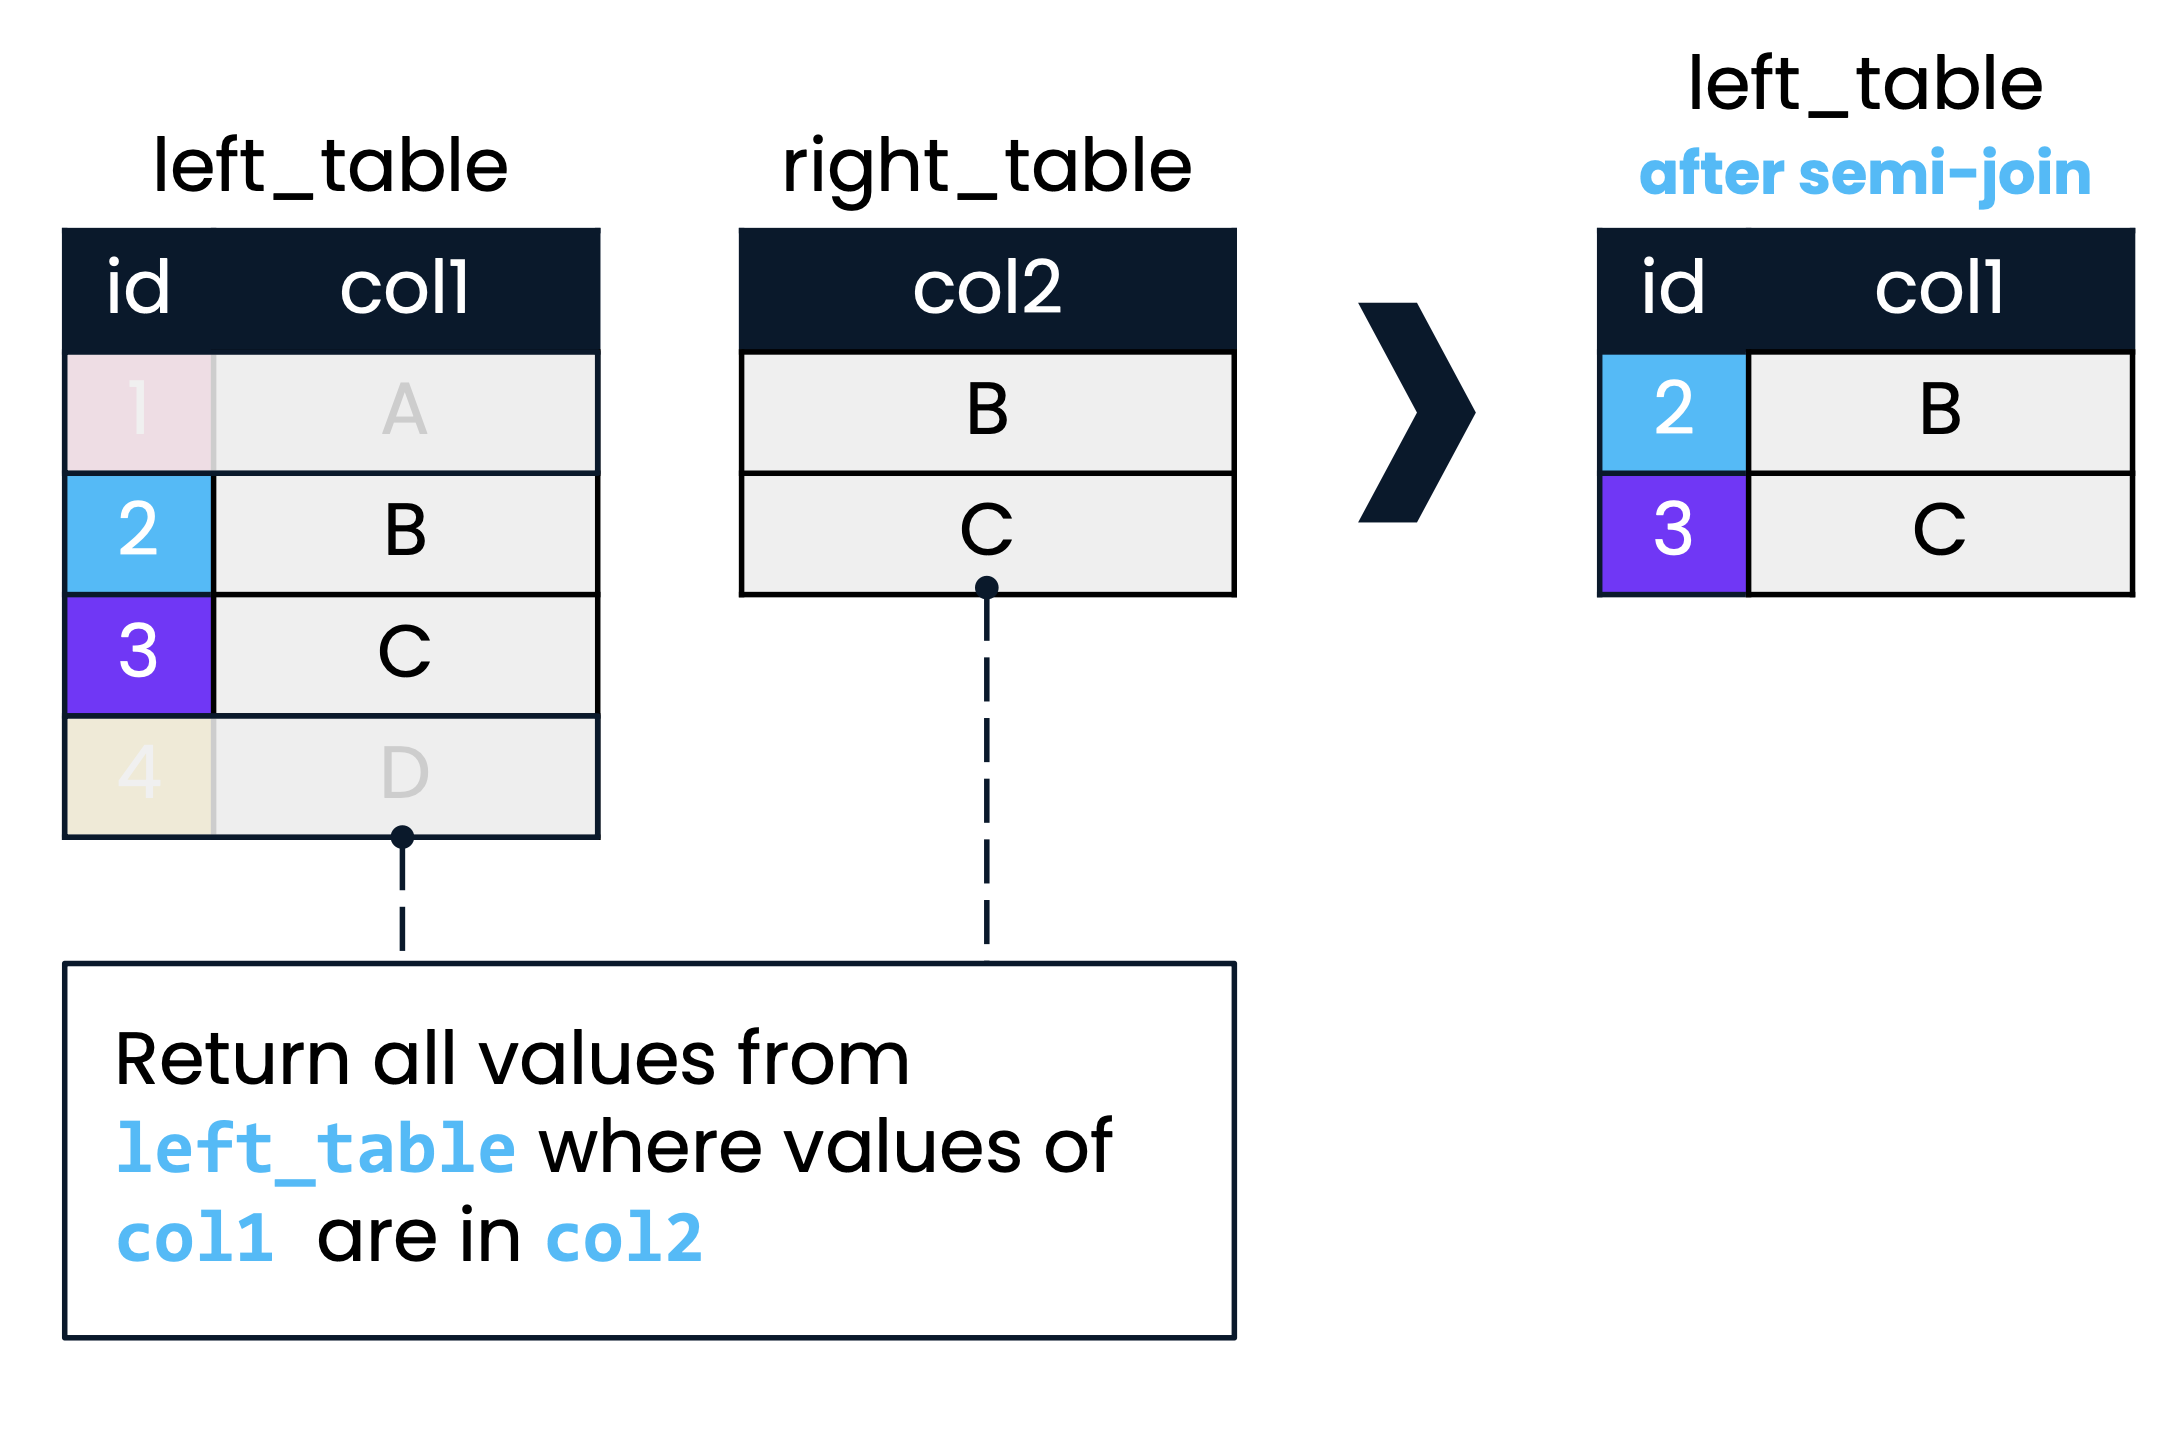

In [235]:
Image('/Users/mishudhar/Downloads/diagrams/semi2.png', height = 600, width = 600)

In [242]:
%%sql
SELECT country, continent, president
FROM presidents
WHERE country IN
     (SELECT country
     FROM states
     WHERE indep_year < 1800);


 * sqlite:///jupyter_sql.db
Done.


[('Portugal', 'Europe', 'Marcelo Rebelo de Sousa'),
 ('USA', 'North America', 'Joe Biden')]

This is inside the bracket is called a subquery.

# Anti join
Anti join is the opposite if semi join

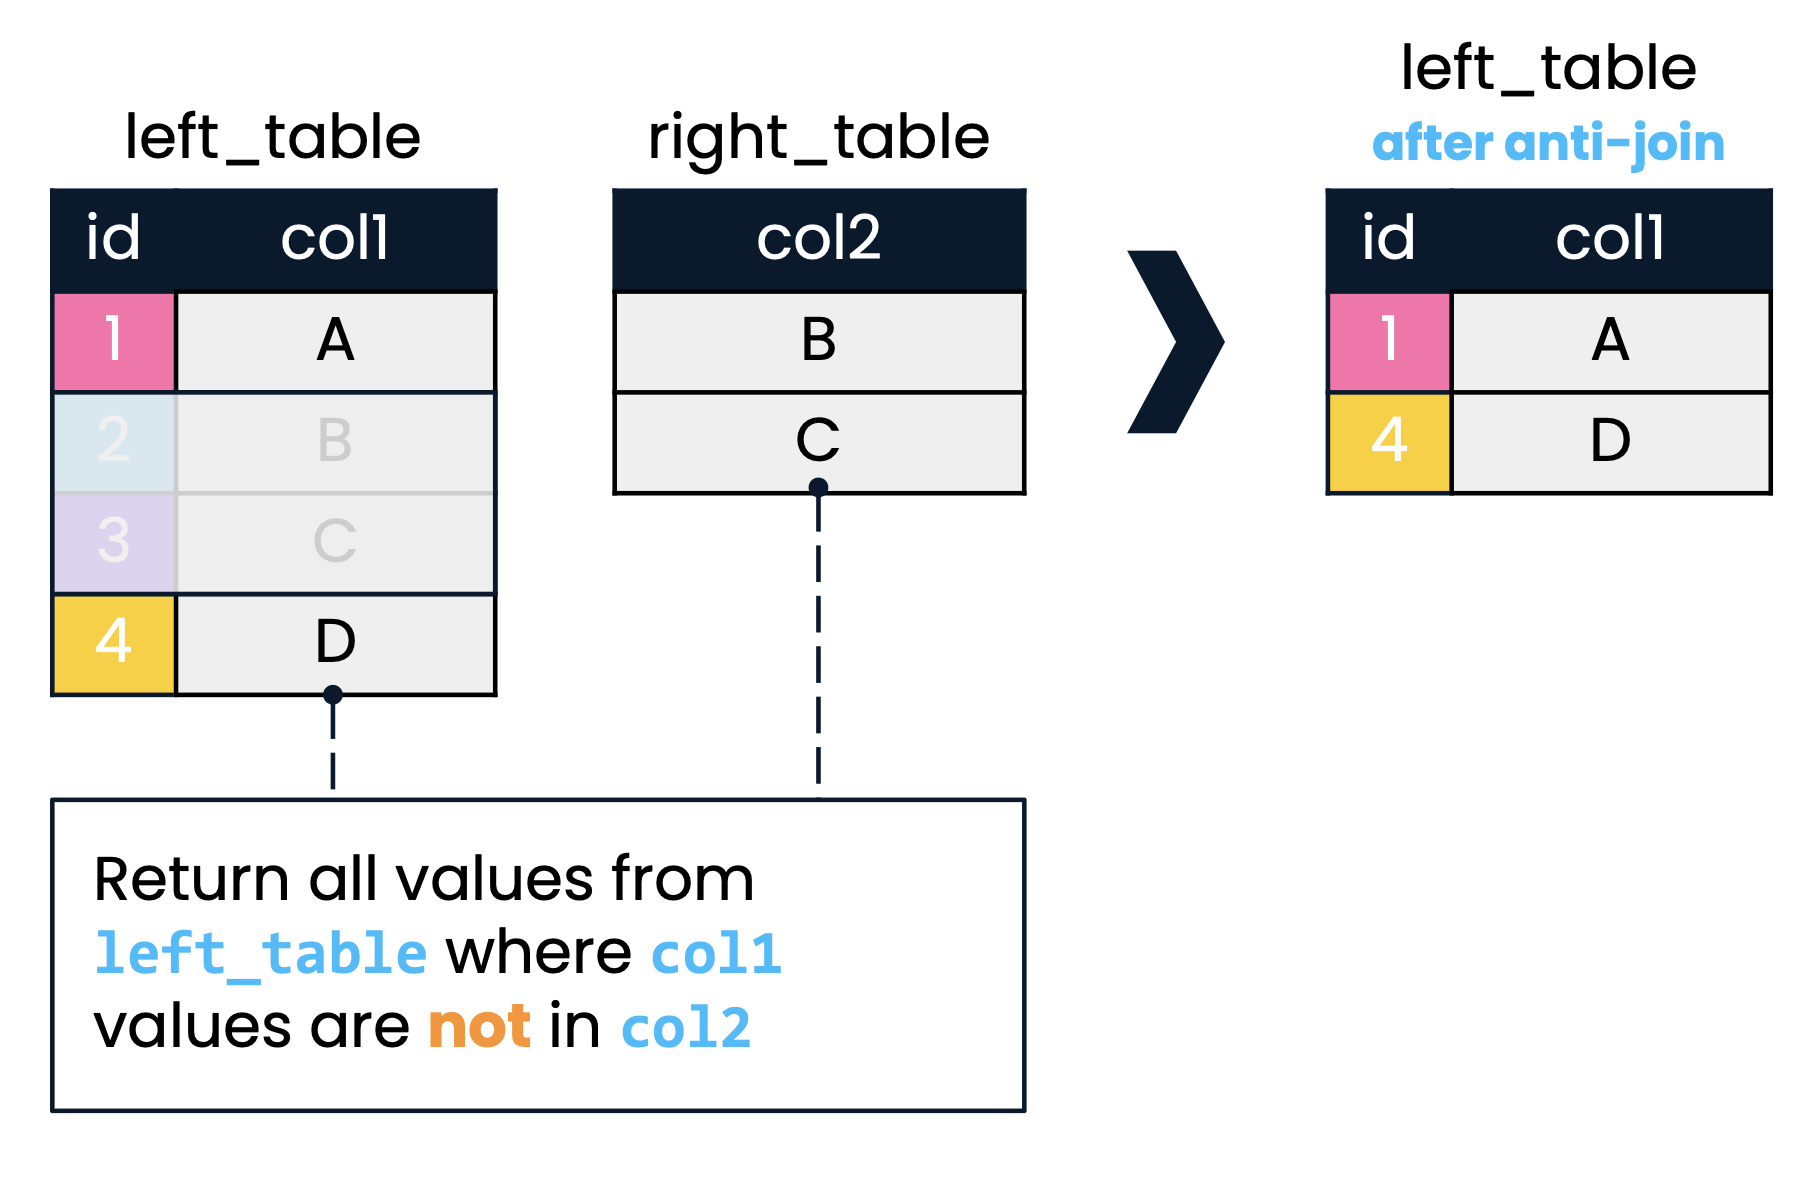

In [239]:
Image('/Users/mishudhar/Downloads/diagrams/anti2.png', height = 600, width = 600)

# How might we adapt our  semi join to determine countries in the Americas founded after 1800?

In [246]:
%%sql
SELECT country, continent, president
FROM presidents
WHERE continent LIKE '%America'
     AND country NOT IN
                  (SELECT country
                  FROM states
                  WHERE indep_year < 1800);

 * sqlite:///jupyter_sql.db
Done.


[('Uruguay', 'South America', 'Luis Lacalle Pou'),
 ('Chile', 'South America', 'Gabriel Boric')]

languages spoken in Middle East

In [255]:
%%sql
SELECT DISTINCT name, code
FROM languages
WHERE code IN
      (SELECT code
      FROM countries
      WHERE region = 'Middle East')
    
   
ORDER BY name
LIMIT 10;

 * sqlite:///jupyter_sql.db
Done.


[('Arabic', 'BHR'),
 ('Arabic', 'CYP'),
 ('Arabic', 'IRQ'),
 ('Arabic', 'ISR'),
 ('Arabic', 'JOR'),
 ('Arabic', 'KWT'),
 ('Arabic', 'LBN'),
 ('Arabic', 'OMN'),
 ('Arabic', 'QAT'),
 ('Arabic', 'SAU')]

In [257]:
%%sql
SELECT c1.code, name, basic_unit AS currency, continent
FROM countries AS c1
INNER JOIN currencies AS c2
ON c1.code = c2.code
WHERE c1.continent = 'Oceania';

 * sqlite:///jupyter_sql.db
Done.


[('AUS', 'Australia', 'Australian dollar', 'Oceania'),
 ('KIR', 'Kiribati', 'Australian dollar', 'Oceania'),
 ('MHL', 'Marshall Islands', 'United States dollar', 'Oceania'),
 ('NRU', 'Nauru', 'Australian dollar', 'Oceania'),
 ('PLW', 'Palau', 'United States dollar', 'Oceania'),
 ('PNG', 'Papua New Guinea', 'Papua New Guinean kina', 'Oceania'),
 ('PYF', 'French Polynesia', 'CFP franc', 'Oceania'),
 ('SLB', 'Solomon Islands', 'Solomon Islands dollar', 'Oceania'),
 ('WSM', 'Samoa', 'Samoan tala', 'Oceania'),
 ('TON', 'Tonga', 'Tongan paʻanga', 'Oceania'),
 ('TUV', 'Tuvalu', 'Australian dollar', 'Oceania'),
 ('TUV', 'Tuvalu', 'Tuvaluan dollar', 'Oceania'),
 ('NCL', 'New Caledonia', 'CFP franc', 'Oceania'),
 ('NZL', 'New Zealand', 'New Zealand dollar', 'Oceania'),
 ('VUT', 'Vanuatu', 'Vanuatu vatu', 'Oceania')]

# Subqueries inside WHERE and SELECT

select *

from some_table

where some_field IN

      (select some_numeric_field
      
      from another_table
      where field2 = some_condition);

In [261]:
%%sql
SELECT DISTINCT continent,

   (SELECT count(*)
    FROM monarchs
    WHERE states.continent = monarchs.continent) AS monarch_count


FROM states;

 * sqlite:///jupyter_sql.db
Done.


[('Oceania', 0),
 ('Asia', 2),
 ('South America', 0),
 ('Africa', 0),
 ('Europe', 2),
 ('North America', 0)]

subqueries inside WHERE can either be from the same table or a different table. In this exercise, you will nest a subquery from the populations table inside another query from the same table, populations. Your goal is to figure out which countries had high average life expectancies in 2015.

In [264]:
%%sql
SELECT *
FROM populations
WHERE life_expectancy > 1.5 *
      (SELECT AVG(life_expectancy)
      FROM populations
      WHERE year = 2015)
    
      AND year = 2015;


 * sqlite:///jupyter_sql.db
Done.


[]

In [269]:
%%sql
SELECT *
FROM populations
WHERE life_expectancy < 1.5 * (SELECT AVG(life_expectancy)
FROM populations
WHERE year = 2015)
AND year = 2015;


 * sqlite:///jupyter_sql.db
Done.


[(1, 19, 'ABW', 2015, 1.647, 75.5735853658537, 103889.0),
 (3, 1, 'AFG', 2015, 4.653, 60.7171707317073, 32526562.0),
 (5, 11, 'AGO', 2015, 5.996, 52.6660975609756, 25021974.0),
 (7, 3, 'ALB', 2015, 1.793, 78.0144634146342, 2889167.0),
 (11, 408, 'ARE', 2015, 1.767, 77.541243902439, 9156963.0),
 (13, 15, 'ARG', 2015, 2.308, 76.3342195121951, 43416755.0),
 (15, 17, 'ARM', 2015, 1.517, 74.7971219512195, 3017712.0),
 (19, 13, 'ATG', 2015, 2.063, 76.1002195121951, 91818.0),
 (21, 21, 'AUS', 2015, 1.833, 82.4512195121951, 23789752.0),
 (23, 23, 'AUT', 2015, 1.47, 81.8439024390244, 8638366.0),
 (25, 25, 'AZE', 2015, 1.97, 70.8487804878049, 9649341.0),
 (27, 63, 'BDI', 2015, 5.863, 57.1070487804878, 11178921.0),
 (29, 37, 'BEL', 2015, 1.74, 81.2878048780488, 11249420.0),
 (31, 41, 'BEN', 2015, 4.688, 59.7207073170732, 10879829.0),
 (33, 61, 'BFA', 2015, 5.437, 58.9312926829268, 18105570.0),
 (35, 31, 'BGD', 2015, 2.144, 72.0011951219512, 160995642.0),
 (37, 59, 'BGR', 2015, 1.53, 74.4658536585366, 7177991.0),
 (39, 29, 'BHR', 2015, 2.035, 76.8190975609756, 1377237.0),
 (41, 27, 'BHS', 2015, 1.861, 75.3968292682927, 388019.0),
 (43, 49, 'BIH', 2015, 1.253, 76.5885853658537, 3810416.0),
 (45, 35, 'BLR', 2015, 1.724, 73.6243902439025, 9489616.0),
 (47, 39, 'BLZ', 2015, 2.546, 70.1923658536585, 359287.0),
 (49, 43, 'BMU', 2015, 1.62, 81.0121951219512, 65235.0),
 (51, 47, 'BOL', 2015, 2.923, 68.7396097560976, 10724705.0),
 (53, 53, 'BRA', 2015, 1.778, 74.6758780487805, 207847528.0),
 (55, 33, 'BRB', 2015, 1.796, 75.6584390243903, 284215.0),
 (57, 57, 'BRN', 2015, 1.856, 79.0408292682927, 423188.0),
 (59, 45, 'BTN', 2015, 1.984, 69.8328536585366, 774830.0),
 (61, 51, 'BWA', 2015, 2.799, 64.4874146341464, 2262485.0),
 (63, 75, 'CAF', 2015, 4.206, 51.4191219512195, 4900274.0),
 (65, 71, 'CAN', 2015, 1.6, 82.1376341463415, 35848610.0),
 (67, 376, 'CHE', 2015, 1.54, 83.1975609756098, 8281430.0),
 (69, 79, 'CHI', 2015, 1.473, 80.7516829268293, 163692.0),
 (71, 81, 'CHL', 2015, 1.749, 81.7875609756098, 17948141.0),
 (73, 83, 'CHN', 2015, 1.569, 75.9863414634146, 1371220000.0),
 (75, 95, 'CIV', 2015, 4.937, 51.919756097561, 22701556.0),
 (77, 69, 'CMR', 2015, 4.63, 55.9343902439024, 23344179.0),
 (79, 89, 'COD', 2015, 5.908, 59.0239024390244, 77266814.0),
 (81, 91, 'COG', 2015, 4.811, 62.8676585365854, 4620330.0),
 (83, 85, 'COL', 2015, 1.875, 74.1820243902439, 48228704.0),
 (85, 87, 'COM', 2015, 4.418, 63.5540243902439, 788474.0),
 (87, 65, 'CPV', 2015, 2.268, 73.3556341463415, 520502.0),
 (89, 93, 'CRI', 2015, 1.8, 79.5864634146341, 4807850.0),
 (91, 99, 'CUB', 2015, 1.606, 79.5464146341464, 11389562.0),
 (97, 103, 'CYP', 2015, 1.438, 80.3070975609756, 1165300.0),
 (99, 105, 'CZE', 2015, 1.53, 79.4731707317073, 10546059.0),
 (101, 144, 'DEU', 2015, 1.5, 81.090243902439, 81679769.0),
 (103, 109, 'DJI', 2015, 3.131, 62.2856585365854, 887861.0),
 (107, 107, 'DNK', 2015, 1.69, 81.1, 5683483.0),
 (109, 113, 'DOM', 2015, 2.451, 73.6766829268293, 10528391.0),
 (111, 5, 'DZA', 2015, 2.805, 75.0425365853659, 39666519.0),
 (113, 115, 'ECU', 2015, 2.513, 76.1029268292683, 16144363.0),
 (115, 117, 'EGY', 2015, 3.314, 71.3169512195122, 91508084.0),
 (117, 434, 'ERI', 2015, 4.207, 64.1009024390244, None),
 (119, 356, 'ESP', 2015, 1.32, 83.3804878048781, 46443994.0),
 (121, 124, 'EST', 2015, 1.54, 77.1317073170732, 1314608.0),
 (123, 126, 'ETH', 2015, 4.275, 64.5780487804878, 99390750.0),
 (125, 132, 'FIN', 2015, 1.71, 81.3853658536585, 5479531.0),
 (127, 130, 'FJI', 2015, 2.54, 70.2562682926829, 892145.0),
 (129, 134, 'FRA', 2015, 2.01, 82.6707317073171, 66538391.0),
 (131, 128, 'FRO', 2015, 2.4, 81.6341463414634, 48199.0),
 (133, 256, 'FSM', 2015, 3.193, 69.234243902439, 104460.0),
 (135, 138, 'GAB', 2015, 3.849, 64.8903414634146, 1725292.0),
 (137, 410, 'GBR', 2015, 1.81, 81.6048780487805, 65128861.0),
 (139, 142, 'GEO', 2015, 1.815, 74.8174146341463, 3717100.0),
 (141, 146, 'GHA', 2015, 4.117, 61.4917317073171, 27409893.0),
 (145, 160, 'GIN', 2015, 4.932, 

In this exercise, we will strengthen your knowledge of subquerying by identifying capital cities in order of largest to smallest population.

In [270]:
%%sql

SELECT name, country_code, urbanarea_pop
FROM cities
WHERE name IN
(SELECT capital
FROM countries)
ORDER BY urbanarea_pop DESC;

 * sqlite:///jupyter_sql.db
Done.


[('Beijing', 'CHN', 21516000),
 ('Dhaka', 'BGD', 14543124),
 ('Tokyo', 'JPN', 13513734),
 ('Moscow', 'RUS', 12197596),
 ('Cairo', 'EGY', 10230350),
 ('Kinshasa', 'COD', 10130000),
 ('Jakarta', 'IDN', 10075310),
 ('Seoul', 'KOR', 9995784),
 ('Mexico City', 'MEX', 8974724),
 ('Lima', 'PER', 8852000),
 ('London', 'GBR', 8673713),
 ('Bangkok', 'THA', 8280925),
 ('Tehran', 'IRN', 8154051),
 ('Bogota', 'COL', 7878783),
 ('Baghdad', 'IRQ', 7180889),
 ('Hanoi', 'VNM', 6844100),
 ('Santiago', 'CHL', 5743719),
 ('Riyadh', 'SAU', 5676621),
 ('Singapore', 'SGP', 5535000),
 ('Ankara', 'TUR', 5271000),
 ('Khartoum', 'SDN', 3639598),
 ('Berlin', 'DEU', 3517424),
 ('Algiers', 'DZA', 3415811),
 ('Kabul', 'AFG', 3414100),
 ('Pyongyang', 'PRK', 3255388),
 ('Madrid', 'ESP', 3207247),
 ('Baku', 'AZE', 3202300),
 ('Nairobi', 'KEN', 3138369),
 ('Addis Ababa', 'ETH', 3103673),
 ('Buenos Aires', 'ARG', 3054300),
 ('Kiev', 'UKR', 2908703),
 ('Rome', 'ITA', 2877215),
 ('Luanda', 'AGO', 2825311),
 ('Quito', 'ECU', 2671191),
 ('Managua', 'NIC', 2560789),
 ('Brasilia', 'BRA', 2556149),
 ('Yaounde', 'CMR', 2440462),
 ('Tashkent', 'UZB', 2309600),
 ('Phnom Penh', 'KHM', 2234566),
 ('Paris', 'FRA', 2229621),
 ('Ouagadougou', 'BFA', 2200000),
 ('Guatemala City', 'GTM', 2110100),
 ('Havana', 'CUB', 2106146),
 ('Accra', 'GHA', 2070463),
 ('Minsk', 'BLR', 1959781),
 ('Caracas', 'VEN', 1943901),
 ("Sana'a", 'YEM', 1937451),
 ('Islamabad', 'PAK', 1900000),
 ('Vienna', 'AUT', 1863881),
 ('Brazzaville', 'COG', 1827000),
 ('Manila', 'PHL', 1780148),
 ('Kuala Lumpur', 'MYS', 1768000),
 ('Maputo', 'MOZ', 1766184),
 ('Budapest', 'HUN', 1759407),
 ('Warsaw', 'POL', 1753977),
 ('Lusaka', 'ZMB', 1742979),
 ('Harare', 'ZWE', 1606000),
 ('Kampala', 'UGA', 1507080),
 ('Prague', 'CZE', 1324000),
 ('Montevideo', 'URY', 1305082),
 ('Abuja', 'NGA', 1235880),
 ('Dakar', 'SEN', 1146053),
 ('Abu Dhabi', 'ARE', 1145000),
 ('Tripoli', 'LBY', 1126000),
 ('Yerevan', 'ARM', 1060138),
 ('Tunis', 'TUN', 1056247)]

In [272]:
%%sql
SELECT countries.name AS country, COUNT(*) AS city_num
FROM countries
LEFT JOIN
ON countries.code = cities.country_code
GROUP BY country
ORDER BY city_num DESC, country
LIMIT 10;

 * sqlite:///jupyter_sql.db
(sqlite3.OperationalError) near "ON": syntax error
[SQL: SELECT countries.name AS country, COUNT(*) AS city_num
FROM countries
LEFT JOIN
ON countries.code = cities.country_code
GROUP BY country
ORDER BY city_num DESC, country
LIMIT 10;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [274]:
%%sql
SELECT countries.name AS country, COUNT(*) AS city_num
FROM countries
LEFT JOIN cities
ON countries.code = cities.country_code
GROUP BY country
ORDER BY city_num DESC, country
LIMIT 10;


 * sqlite:///jupyter_sql.db
Done.


[('China', 36),
 ('India', 18),
 ('Japan', 11),
 ('Brazil', 10),
 ('Pakistan', 9),
 ('United States', 9),
 ('Indonesia', 7),
 ('Russian Federation', 7),
 ('South Korea', 7),
 ('Iran', 6)]

In [ ]:
%%sql
SELECT DISTINCT continent,

   (SELECT count(*)
    FROM monarchs
    WHERE states.continent = monarchs.continent) AS monarch_count


FROM states;

In [280]:
%%sql
SELECT DISTINCT name AS country,
(select count(*)
from cities
where countries.code = cities.country_code) AS city_num


FROM countries
ORDER by city_num DESC, country
LIMIT 10;

 * sqlite:///jupyter_sql.db
Done.


[('China', 36),
 ('India', 18),
 ('Japan', 11),
 ('Brazil', 10),
 ('Pakistan', 9),
 ('United States', 9),
 ('Indonesia', 7),
 ('Russian Federation', 7),
 ('South Korea', 7),
 ('Iran', 6)]

# Subqueries Inside FROM

In [281]:
%%sql
select distinct monarchs.continent, sub.most_recent
from monarchs,
(select continent,
 max(indep_year) as most_recent
from states
group by continent) as sub

where monarchs.continent = sub.continent
order by continent;

 * sqlite:///jupyter_sql.db
(sqlite3.OperationalError) ambiguous column name: continent
[SQL: select distinct monarchs.continent, sub.most_recent
from monarchs,
(select continent,
 max(indep_year) as most_recent
from states
group by continent) as sub

where monarchs.continent = sub.continent
order by continent;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [282]:
%%sql
SELECT countries.local_name, sub.lang_num
FROM countries,
     (SELECT code, count(*) AS lang_num
     FROM languages
     GROUP BY code) AS sub
    
WHERE countries.code = sub.code
ORDER BY lang_num DESC;

 * sqlite:///jupyter_sql.db
Done.


[('Zambia', 19),
 ('YeItyop´iya', 16),
 ('Zimbabwe', 16),
 ('Bharat/India', 14),
 ('Nepal', 14),
 ('South Africa', 13),
 ('Mali', 13),
 ('France', 13),
 ('Angola', 12),
 ('Malawi', 12),
 ('Ghana', 11),
 ('Pakistan', 11),
 ('Panama', 11),
 ('Canada', 10),
 ('Kypros/Kibris', 10),
 ('Singapore/Singapura/Xinjiapo/Singapur', 10),
 ('Schweiz/Suisse/Svizzera/Svizra', 10),
 ('Australia', 9),
 ('Belize', 9),
 ('Botswana', 9),
 ('Zhongquo', 9),
 ('Micronesia', 9),
 ('Namibia', 9),
 ('New Zealand/Aotearoa', 9),
 ('Iran', 8),
 ('Malaysia', 8),
 ('Mocambique', 8),
 ('Sao Tome e Principe', 8),
 ('Aruba', 7),
 ('Bolivia', 7),
 ('Ertra', 7),
 ('Al-Maghrib', 7),
 ('Moldova', 7),
 ('Northern Mariana Islands', 7),
 ('Senegal/Sounougal', 7),
 ('Suriya', 7),
 ('Magyarorszag', 7),
 ('Al-Jaza\x92ir/Algerie', 6),
 ('Argentina', 6),
 ('Burundi/Uburundi', 6),
 ('Le Gabon', 6),
 ('Guam', 6),
 ('Makedonija', 6),
 ('Nigeria', 6),
 ('Belau/Palau', 6),
 ('Peru/Piruw', 6),
 ('Rwanda/Urwanda', 6),
 ('Uganda', 6),
 ('Amerika Samoa', 5),
 ('Al-Imarat al-´Arabiya al-Muttahida', 5),
 ('Bosna i Hercegovina', 5),
 ('Balgarija', 5),
 ('Cayman Islands', 5),
 ('Chile', 5),
 ('Espana', 5),
 ('The Gambia', 5),
 ('Sakartvelo', 5),
 ('Guyana', 5),
 ('Al-´Iraq', 5),
 ('Osterreich', 5),
 ('Republique Democratique du Congo', 5),
 ('Lietuva', 5),
 ('Luxembourg/Letzebuerg', 5),
 ('Muritaniya/Mauritanie', 5),
 ('Mauritius', 5),
 ('´Uman', 5),
 ('Sesel/Seychelles', 5),
 ('Slovensko', 5),
 ('Slovenija', 5),
 ('As-Sudan', 5),
 ('Suriname', 5),
 ('Togo', 5),
 ('Trinidad and Tobago', 5),
 ('Vanuatu', 5),
 ('Eesti', 5),
 ('Afganistan/Afqanestan', 4),
 ('Shqiperia', 4),
 ('Andorra', 4),
 ('Azarbaycan', 4),
 ('Al-Bahrayn', 4),
 ('Druk-Yul', 4),
 ('Djibouti/Jibuti', 4),
 ('Ecuador', 4),
 ('Gibraltar', 4),
 ('Guine-Bissau', 4),
 ('Indonesia', 4),
 ('Island', 4),
 ('Italia', 4),
 ('Kyrgyzstan', 4),
 ('Hrvatska', 4),
 ('Lao', 4),
 ('Latvija', 4),
 ('Lesotho', 4),
 ('Lubnan', 4),
 ('Libiya', 4),
 ('Malta', 4),
 ('Monaco', 4),
 ('Nicaragua', 4),
 ('Papua New Guinea/Papua Niugini', 4),
 ('Polska', 4),
 ('Guinea Ecuatorial', 4),
 ('Sierra Leone', 4),
 ('Soomaaliya', 4),
 ('Suomi', 4),
 ('Tanzania', 4),
 ('Danmark', 4),
 ('Tonga', 4),
 ('Tchad/Tshad', 4),
 ('Turkmenostan', 4),
 ('Tuvalu', 4),
 ('Uzbekiston', 4),
 ('Belarus', 4),
 ('Rossija', 4),
 ('Hajastan', 3),
 ('Belgie/Belgique', 3),
 ('Benin', 3),
 ('Brunei Darussalam', 3),
 ('Pilipinas', 3),
 ('Foroyar', 3),
 ('Kalaallit Nunaat/Gronland', 3),
 ('Yisra\x92el/Isra\x92il', 3),
 ('Cameroun/Cameroon', 3),
 ('Kenya', 3),
 ('Centrafrique/Be-Afrika', 3),
 ('Komori/Comores', 3),
 ('Congo', 3),
 ('Liechtenstein', 3),
 ('Madagasikara/Madagascar', 3),
 ('Mexico', 3),
 ('Mongol Uls', 3),
 ('Naoero/Nauru', 3),
 ('Niger', 3),
 ('Norge', 3),
 ('Polynesie francaise', 3),
 ('Solomon Islands', 3),
 ('Sri Lanka/Ilankai', 3),
 ('Prathet Thai', 3),
 ('Tunis/Tunisie', 3),
 ('Turkiye', 3),
 ('Ukrajina', 3),
 ('Uruguay', 3),
 ('Viet Nam', 3),
 ('United States', 3),
 ('Antigua and Barbuda', 2),
 ('The Bahamas', 2),
 ('Bangladesh', 2),
 ('Barbados', 2),
 ('Bermuda', 2),
 ('Burkina Faso', 2),
 ('Costa Rica', 2),
 ('Dominica', 2),
 ('Misr', 2),
 ('El Salvador', 2),
 ('Grenada', 2),
 ('Guatemala', 2),
 ('Haiti/Dayti', 2),
 ('Honduras', 2),
 ('Ireland/Eire', 2),
 ('Jamaica', 2),
 ('Al-Urdunn', 2),
 ('Kampuchea', 2),
 ('Qazaqstan', 2),
 ('Kiribati', 2),
 ('Taehan Min\x92guk (Namhan)', 2),
 ('Ellada', 2),
 ('Al-Kuwayt', 2),
 ('Liberia', 2),
 ('Dhivehi Raajje/Maldives', 2),
 ('Marshall Islands/Majol', 2),
 ('Cote d\x92Ivoire', 2),
 ('Paraguay', 2),
 ('Portugal', 2),
 ('Puerto Rico', 2),
 ('Qatar', 2),
 ('Saint Lucia', 2),
 ('Saint Vincent and the Grenadines', 2),
 ('Samoa', 2),
 ('kaNgwane', 2),
 ('Tocikiston', 2),
 ('Nouvelle-Caledonie', 2),
 ('Venezuela', 2),
 ('Nederland', 1),
 ('Brasil', 1),
 ('United Kingdom', 1),
 ('Republica Dominicana', 1),
 ('Guinee', 1),
 ('Nihon/Nippon', 1),
 ('Al-Yaman', 1),
 ('Colombia', 1),
 ('Choson Minjujuui In´min Konghwaguk (Bukhan)', 1)

In [286]:
%%sql
SELECT code, inflation_rate, unemployment_rate
FROM economies
WHERE year = 2015
AND code NOT IN
    (SELECT code
    FROM countries
    WHERE (gov_form LIKE '%Republic%' OR gov_form LIKE '%Monarchy%'))
    
ORDER BY inflation_rate;

 * sqlite:///jupyter_sql.db
Done.


[('AFG', -1.549, None),
 ('CHE', -1.14, 3.178),
 ('PRI', -0.751, 12.0),
 ('ROU', -0.596, 6.812),
 ('TLS', 0.553, None),
 ('MNE', 1.204, None),
 ('SRB', 1.392, 18.2),
 ('HKG', 3.037, 3.296),
 ('ARE', 4.07, None),
 ('MAC', 4.564, 1.825),
 ('LBY', 9.839, None),
 ('SSD', 52.813, None)]

In [290]:
%%sql
SELECT name, country_code, city_proper_pop,
       metroarea_pop,
       city_proper_pop / metroarea_pop * 100 AS city_perc
        
FROM cities

WHERE name IN
(SELECT capital
FROM countries
WHERE (continent = 'Europe'
OR continent LIKE '%America'))
AND metroarea_pop IS NOT NULL
ORDER BY city_perc DESC
LIMIT 10;

 * sqlite:///jupyter_sql.db
Done.


[('Lima', 'PER', 8852000, 10750000.0, 82.34418604651162),
 ('Bogota', 'COL', 7878783, 9800000.0, 80.39574489795919),
 ('Moscow', 'RUS', 12197596, 16170000.0, 75.43349412492269),
 ('Vienna', 'AUT', 1863881, 2600000.0, 71.68773076923077),
 ('Montevideo', 'URY', 1305082, 1947604.0, 67.00961797162051),
 ('Caracas', 'VEN', 1943901, 2923959.0, 66.48181455348724),
 ('Rome', 'ITA', 2877215, 4353775.0, 66.08552348249508),
 ('Brasilia', 'BRA', 2556149, 3919864.0, 65.21014504584853),
 ('London', 'GBR', 8673713, 13879757.0, 62.491821722815466),
 ('Budapest', 'HUN', 1759407, 2927944.0, 60.09018615110126)]

# Semi Join
Select all the distinct languages that is spoken innthe country of middle east

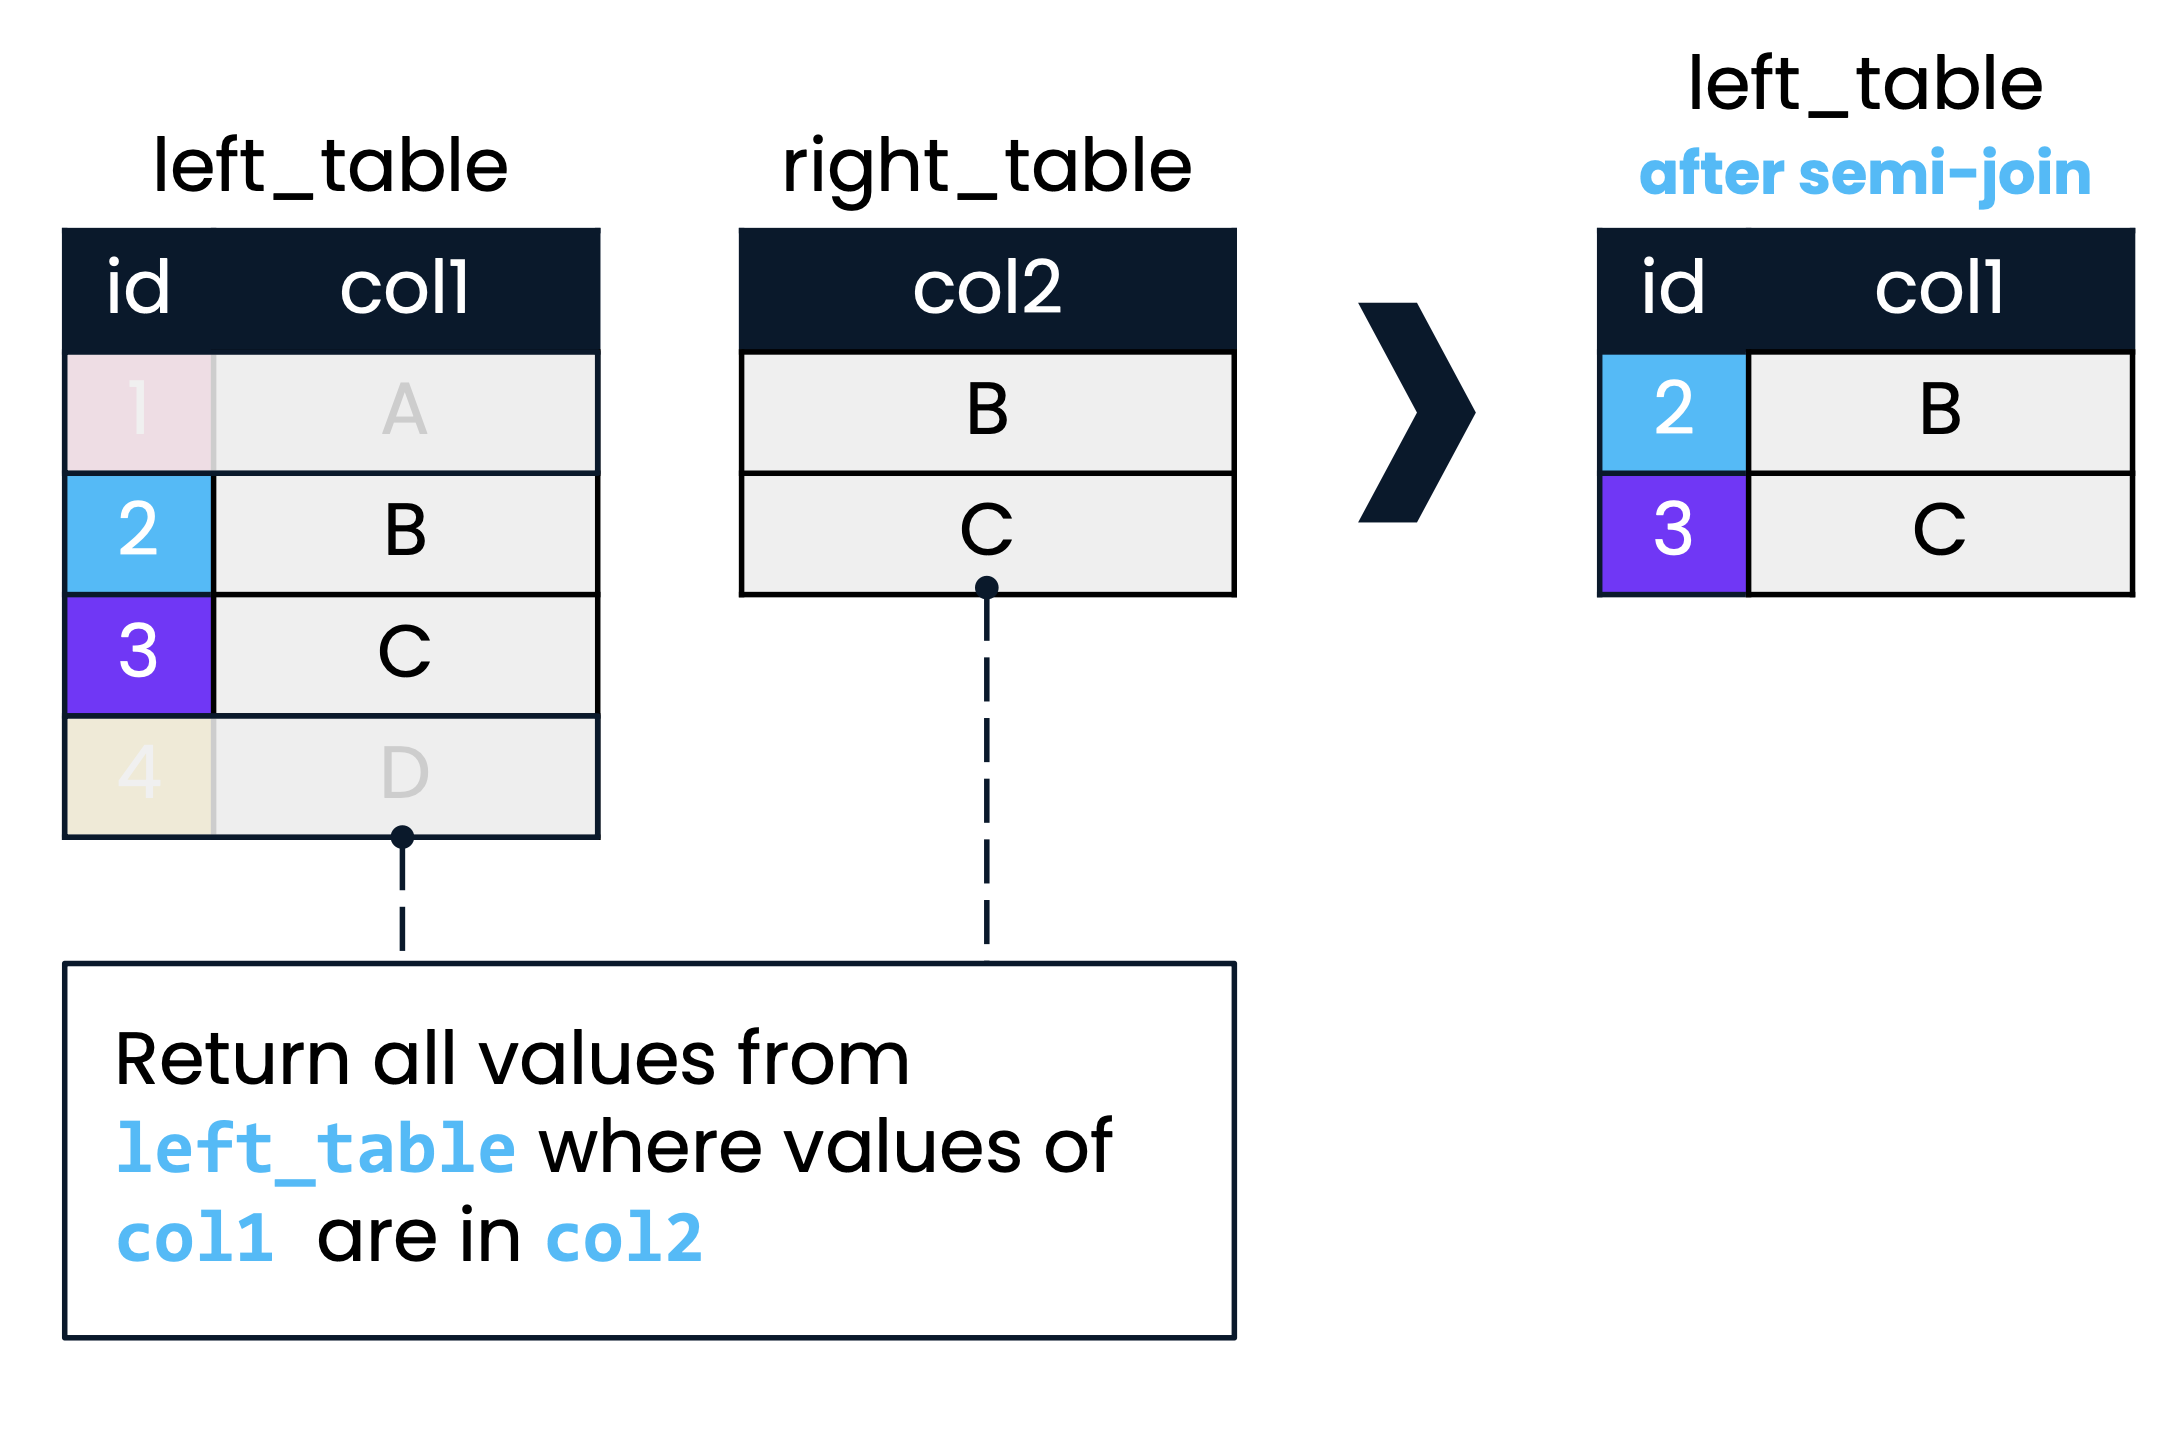

In [31]:
from IPython.display import Image
Image(filename = '/Users/mishudhar/Downloads/diagrams/semi2.png', width = 400, height = 400)

In [32]:
%%sql
SELECT *
FROM countries
limit 2;

 * sqlite:///jupyter_sql.db
Done.


[(0, 'AFG', 'Afghanistan', 'Asia', 'Southern and Central Asia', 652090.0, 1919.0, 'Afganistan/Afqanestan', 'Islamic Emirate', 'Kabul', 69.1761, 34.5228),
 (1, 'NLD', 'Netherlands', 'Europe', 'Western Europe', 41526.0, 1581.0, 'Nederland', 'Constitutional Monarchy', 'Amsterdam', 4.89095, 52.3738)]

In [34]:
%%sql
select *
from languages
limit 2;

 * sqlite:///jupyter_sql.db
Done.


[(0, 1, 'AFG', 'Dari', 50.0, 1), (1, 2, 'AFG', 'Pashto', 35.0, 1)]

In [46]:
%%sql
SELECT DISTINCT name 
FROM languages 
WHERE code IN 
    (SELECT code 
     FROM countries 
     WHERE region = 'Middle East') 
ORDER BY name;


 * sqlite:///jupyter_sql.db
Done.


[('Arabic',),
 ('Aramaic',),
 ('Armenian',),
 ('Azerbaijani',),
 ('Azeri',),
 ('Baluchi',),
 ('Bulgarian',),
 ('Circassian',),
 ('English',),
 ('Farsi',),
 ('Filipino',),
 ('French',),
 ('Georgian',),
 ('Greek',),
 ('Hebrew',),
 ('Hindi',),
 ('Indian',),
 ('Kurdish',),
 ('Other',),
 ('Persian',),
 ('Romanian',),
 ('Russian',),
 ('Syriac',),
 ('Turkish',),
 ('Turkmen',),
 ('Urdu',),
 ('unspecified',)]

In [52]:
%%sql
SELECT code, name
FROM countries
WHERE continent = 'Oceania';

 * sqlite:///jupyter_sql.db
Done.


[('ASM', 'American Samoa'),
 ('AUS', 'Australia'),
 ('FJI', 'Fiji Islands'),
 ('GUM', 'Guam'),
 ('KIR', 'Kiribati'),
 ('MHL', 'Marshall Islands'),
 ('FSM', 'Micronesia, Federated States of'),
 ('NRU', 'Nauru'),
 ('PLW', 'Palau'),
 ('PNG', 'Papua New Guinea'),
 ('MNP', 'Northern Mariana Islands'),
 ('PYF', 'French Polynesia'),
 ('SLB', 'Solomon Islands'),
 ('WSM', 'Samoa'),
 ('TON', 'Tonga'),
 ('TUV', 'Tuvalu'),
 ('NCL', 'New Caledonia'),
 ('NZL', 'New Zealand'),
 ('VUT', 'Vanuatu')]

In [54]:
%%sql
SELECT code, name
FROM countries
WHERE continent = 'Oceania'
  AND code NOT IN
       (SELECT code
       FROM currencies)

 * sqlite:///jupyter_sql.db
Done.


[('ASM', 'American Samoa'),
 ('FJI', 'Fiji Islands'),
 ('GUM', 'Guam'),
 ('FSM', 'Micronesia, Federated States of'),
 ('MNP', 'Northern Mariana Islands')]

# Syntax for subqueries inside WHERE

Select *

From some_table

Where some_field IN

      (select some_numeric_field
      
       from another_table
       
       where field2 = some_condition);

In [55]:
%%sql
select *
from monarchs;


 * sqlite:///jupyter_sql.db
Done.


[(0, 'Brunei', 'Asia', 'Hassanal Bolkiah'),
 (1, 'Norway', 'Europe', 'Harald V'),
 (2, 'Oman', 'Asia', 'Haitham bin Tarik'),
 (3, 'United Kingdom', 'Europe', 'Queen Elizabeth II')]

In [56]:
%%sql
select *
from states;

 * sqlite:///jupyter_sql.db
Done.


[(0, 'Australia', 'Oceania', 1901),
 (1, 'Brunei', 'Asia', 1984),
 (2, 'Chile', 'South America', 1818),
 (3, 'Egypt', 'Africa', 1922),
 (4, 'India', 'Asia', 1947),
 (5, 'Norway', 'Europe', 1905),
 (6, 'Oman', 'Asia', 1951),
 (7, 'Pakistan', 'Asia', 1947),
 (8, 'Portugal', 'Europe', 1143),
 (9, 'Uruguay', 'South America', 1825),
 (10, 'USA', 'North America', 1776)]

In [63]:
%%sql
select distinct continent
from states;

 * sqlite:///jupyter_sql.db
Done.


[('Oceania',),
 ('Asia',),
 ('South America',),
 ('Africa',),
 ('Europe',),
 ('North America',)]

# then add a subquery inside the table

In [259]:
%%sql
select distinct continent,
     (select count(*)
     from monarchs
     where monarchs.continent = states.continent) as monarch_count
from states;

 * sqlite:///jupyter_sql.db
Done.


[('Oceania', 0),
 ('Asia', 2),
 ('South America', 0),
 ('Africa', 0),
 ('Europe', 2),
 ('North America', 0)]

In this exercise, we will nest a subquery from the populations table inside another query from the same table, populations. Our goal is to figure out which countries had high average life expectancies in 2015.

In [67]:
%%sql
select avg(life_expectancy)
from populations
where year = 2015;

 * sqlite:///jupyter_sql.db
Done.


[(71.67634158659767,)]

In this exercise, we will strengthen your knowledge of subquerying by identifying capital cities in order of largest to smallest population.

In [89]:
%%sql
select name, country_code, urbanarea_pop
from cities
where name in
(select capital
from countries)
order by urbanarea_pop
limit 5;


 * sqlite:///jupyter_sql.db
Done.


[('Tunis', 'TUN', 1056247),
 ('Yerevan', 'ARM', 1060138),
 ('Tripoli', 'LBY', 1126000),
 ('Abu Dhabi', 'ARE', 1145000),
 ('Dakar', 'SEN', 1146053)]

In [71]:
%%sql
select countries.name as country, count(*) as cities_num
from countries
left join cities
on countries.code = cities.country_code
group by country
order by cities_num desc, country
limit 9;

 * sqlite:///jupyter_sql.db
Done.


[('China', 36),
 ('India', 18),
 ('Japan', 11),
 ('Brazil', 10),
 ('Pakistan', 9),
 ('United States', 9),
 ('Indonesia', 7),
 ('Russian Federation', 7),
 ('South Korea', 7)]

In [75]:
%%sql
select countries.name as country,
(select count(*)
from cities
where cities.country_code = countries.code) as city_num
from countries
order by city_num desc, country;

 * sqlite:///jupyter_sql.db
Done.


[('China', 36),
 ('India', 18),
 ('Japan', 11),
 ('Brazil', 10),
 ('Pakistan', 9),
 ('United States', 9),
 ('Indonesia', 7),
 ('Russian Federation', 7),
 ('South Korea', 7),
 ('Iran', 6),
 ('Colombia', 4),
 ('Germany', 4),
 ('Mexico', 4),
 ('Nigeria', 4),
 ('Philippines', 4),
 ('South Africa', 4),
 ('Argentina', 3),
 ('Canada', 3),
 ('Egypt', 3),
 ('Turkey', 3),
 ('Algeria', 2),
 ('Bangladesh', 2),
 ('Cameroon', 2),
 ('Ecuador', 2),
 ('Iraq', 2),
 ('Italy', 2),
 ('Morocco', 2),
 ('Myanmar', 2),
 ('Saudi Arabia', 2),
 ('Spain', 2),
 ('Ukraine', 2),
 ('United Arab Emirates', 2),
 ('United Kingdom', 2),
 ('Venezuela', 2),
 ('Vietnam', 2),
 ('Afghanistan', 1),
 ('Angola', 1),
 ('Armenia', 1),
 ('Australia', 1),
 ('Austria', 1),
 ('Azerbaijan', 1),
 ('Belarus', 1),
 ('Bolivia', 1),
 ('Burkina Faso', 1),
 ('Cambodia', 1),
 ('Chile', 1),
 ('Congo', 1),
 ('Congo, The Democratic Republic of the', 1),
 ("Cote d'Ivoire", 1),
 ('Cuba', 1),
 ('Czech Republic', 1),
 ('Ethiopia', 1),
 ('France', 1),
 ('Georgia', 1),
 ('Ghana', 1),
 ('Guatemala', 1),
 ('Hungary', 1),
 ('Kazakhstan', 1),
 ('Kenya', 1),
 ('Libya', 1),
 ('Malaysia', 1),
 ('Mozambique', 1),
 ('New Zealand', 1),
 ('Nicaragua', 1),
 ('North Korea', 1),
 ('Peru', 1),
 ('Poland', 1),
 ('Senegal', 1),
 ('Singapore', 1),
 ('Sudan', 1),
 ('Tanzania', 1),
 ('Thailand', 1),
 ('Tunisia', 1),
 ('Uganda', 1),
 ('Uruguay', 1),
 ('Uzbekistan', 1),
 ('Yemen', 1),
 ('Zambia', 1),
 ('Zimbabwe', 1),
 ('Albania', 0),
 ('American Samoa', 0),
 ('Andorra', 0),
 ('Antigua and Barbuda', 0),
 ('Aruba', 0),
 ('Bahamas', 0),
 ('Bahrain', 0),
 ('Barbados', 0),
 ('Belgium', 0),
 ('Belize', 0),
 ('Benin', 0),
 ('Bermuda', 0),
 ('Bhutan', 0),
 ('Bosnia and Herzegovina', 0),
 ('Botswana', 0),
 ('Brunei', 0),
 ('Bulgaria', 0),
 ('Burundi', 0),
 ('Cape Verde', 0),
 ('Cayman Islands', 0),
 ('Central African Republic', 0),
 ('Chad', 0),
 ('Comoros', 0),
 ('Costa Rica', 0),
 ('Croatia', 0),
 ('Cyprus', 0),
 ('Denmark', 0),
 ('Djibouti', 0),
 ('Dominica', 0),
 ('Dominican Republic', 0),
 ('El Salvador', 0),
 ('Equatorial Guinea', 0),
 ('Eritrea', 0),
 ('Estonia', 0),
 ('Faroe Islands', 0),
 ('Fiji Islands', 0),
 ('Finland', 0),
 ('French Polynesia', 0),
 ('Gabon', 0),
 ('Gambia', 0),
 ('Gibraltar', 0),
 ('Greece', 0),
 ('Greenland', 0),
 ('Grenada', 0),
 ('Guam', 0),
 ('Guinea', 0),
 ('Guinea-Bissau', 0),
 ('Guyana', 0),
 ('Haiti', 0),
 ('Honduras', 0),
 ('Iceland', 0),
 ('Ireland', 0),
 ('Israel', 0),
 ('Jamaica', 0),
 ('Jordan', 0),
 ('Kiribati', 0),
 ('Kuwait', 0),
 ('Kyrgyzstan', 0),
 ('Laos', 0),
 ('Latvia', 0),
 ('Lebanon', 0),
 ('Lesotho', 0),
 ('Liberia', 0),
 ('Liechtenstein', 0),
 ('Lithuania', 0),
 ('Luxembourg', 0),
 ('Macao', 0),
 ('Macedonia', 0),
 ('Madagascar', 0),
 ('Malawi', 0),
 ('Maldives', 0),
 ('Mali', 0),
 ('Malta', 0),
 ('Marshall Islands', 0),
 ('Mauritania', 0),
 ('Mauritius', 0),
 ('Micronesia, Federated States of', 0),
 ('Moldova', 0),
 ('Monaco', 0),
 ('Mongolia', 0),
 ('Namibia', 0),
 ('Nauru', 0),
 ('Nepal', 0),
 ('Netherlands', 0),
 ('New Caledonia', 0),
 ('Niger', 0),
 ('Northern Mariana Islands', 0),
 ('Norway', 0),
 ('Oman', 0),
 ('Palau', 0),
 ('Palestine', 0),
 ('Panama', 0),
 ('Papua New Guinea', 0),
 ('Paraguay', 0),
 ('Portugal', 0),
 ('Puerto Rico', 0),
 ('Qatar', 0),
 ('Rwanda', 0),
 ('Saint Kitts and Nevis', 0),
 ('Saint Lucia', 0),
 ('Saint Vincent and the Grenadines', 0),
 ('Samoa', 0),
 ('San Marino', 0),
 ('Sao Tome and Principe', 0),
 ('Seychelles', 0),
 ('Sierra Leone', 0),
 ('Slovakia', 0),
 ('Slovenia', 0),
 ('Solomon Islands', 0),
 ('Somalia', 0),
 ('Sri Lanka', 0),
 ('Suriname', 0),
 ('Swaziland', 0),
 ('Sweden', 0),
 ('Switzerland', 0),
 ('Syria', 0),
 ('Tajikistan', 0),
 ('Togo', 0),
 ('Tonga', 0),
 ('Trinidad and Tobago', 0),
 ('Turkmenistan', 0),
 ('Turks and Caicos Islands', 0),
 ('Tuvalu', 0),
 ('Vanuatu', 0),
 ('Virgin Islands, British', 0),
 ('Virgin Islands, U.S.', 0)]

Query to return continents with monarchs and the year the mostb recect country gained indpenedence

In [82]:
%%sql

select distinct monarchs.continent, sub.most_recent
from monarchs,
   (select
       continent,
       max(indep_year) as most_recent
    from states
    group by continent) as sub
where monarchs.continent = sub.continent
order by continent;

 * sqlite:///jupyter_sql.db
(sqlite3.OperationalError) ambiguous column name: continent
[SQL: select distinct monarchs.continent, sub.most_recent
from monarchs,
   (select
       continent,
       max(indep_year) as most_recent
    from states
    group by continent) as sub
where monarchs.continent = sub.continent
order by continent;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [83]:
%%sql
SELECT DISTINCT monarchs.continent, sub.most_recent
FROM monarchs
INNER JOIN (
    SELECT
        continent,
        MAX(indep_year) AS most_recent
    FROM states
    GROUP BY continent
) AS sub
ON monarchs.continent = sub.continent
ORDER BY monarchs.continent;


 * sqlite:///jupyter_sql.db
Done.


[('Asia', 1984), ('Europe', 1905)]

In [84]:
%%sql
select continent, max(indep_year) as most_recent
from states
group by continent;

 * sqlite:///jupyter_sql.db
Done.


[('Africa', 1922),
 ('Asia', 1984),
 ('Europe', 1905),
 ('North America', 1776),
 ('Oceania', 1901),
 ('South America', 1825)]

In [86]:
%%sql
select distinct monarchs.continent
from monarchs;


 * sqlite:///jupyter_sql.db
Done.


[('Asia',), ('Europe',)]

In [105]:
%%sql
select distinct countries.name, subq.city_num
from countries
inner join
     (select country_code, count(*) as city_num
     from cities
     group by country_code) as subq
    
on countries.code = cities.country_code
order by city_num desc;

 * sqlite:///jupyter_sql.db
(sqlite3.OperationalError) no such column: cities.country_code
[SQL: select distinct countries.name, subq.city_num
from countries
inner join
     (select country_code, count(*) as city_num
     from cities
     group by country_code) as subq
    
on countries.code = cities.country_code
order by city_num desc;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [108]:
%%sql
SELECT DISTINCT countries.name, subq.city_num
FROM countries
INNER JOIN (
    SELECT country_code, COUNT(*) AS city_num
    FROM cities
    GROUP BY country_code
) AS subq
ON countries.code = subq.country_code
ORDER BY subq.city_num DESC;


 * sqlite:///jupyter_sql.db
Done.


[('China', 36),
 ('India', 18),
 ('Japan', 11),
 ('Brazil', 10),
 ('Pakistan', 9),
 ('United States', 9),
 ('Indonesia', 7),
 ('South Korea', 7),
 ('Russian Federation', 7),
 ('Iran', 6),
 ('South Africa', 4),
 ('Philippines', 4),
 ('Colombia', 4),
 ('Mexico', 4),
 ('Nigeria', 4),
 ('Germany', 4),
 ('Argentina', 3),
 ('Egypt', 3),
 ('Canada', 3),
 ('Turkey', 3),
 ('Algeria', 2),
 ('United Arab Emirates', 2),
 ('Bangladesh', 2),
 ('United Kingdom', 2),
 ('Ecuador', 2),
 ('Spain', 2),
 ('Iraq', 2),
 ('Italy', 2),
 ('Cameroon', 2),
 ('Morocco', 2),
 ('Myanmar', 2),
 ('Saudi Arabia', 2),
 ('Ukraine', 2),
 ('Venezuela', 2),
 ('Vietnam', 2),
 ('Afghanistan', 1),
 ('Angola', 1),
 ('Armenia', 1),
 ('Australia', 1),
 ('Azerbaijan', 1),
 ('Bolivia', 1),
 ('Burkina Faso', 1),
 ('Chile', 1),
 ('Ethiopia', 1),
 ('Georgia', 1),
 ('Ghana', 1),
 ('Guatemala', 1),
 ('Austria', 1),
 ('Yemen', 1),
 ('Cambodia', 1),
 ('Kazakhstan', 1),
 ('Kenya', 1),
 ('Congo', 1),
 ('Congo, The Democratic Republic of the', 1),
 ('North Korea', 1),
 ('Cuba', 1),
 ('Libya', 1),
 ('Malaysia', 1),
 ('Mozambique', 1),
 ('Nicaragua', 1),
 ("Cote d'Ivoire", 1),
 ('Peru', 1),
 ('Poland', 1),
 ('France', 1),
 ('Zambia', 1),
 ('Senegal', 1),
 ('Singapore', 1),
 ('Sudan', 1),
 ('Tanzania', 1),
 ('Thailand', 1),
 ('Czech Republic', 1),
 ('Tunisia', 1),
 ('Uganda', 1),
 ('Hungary', 1),
 ('Uruguay', 1),
 ('New Zealand', 1),
 ('Uzbekistan', 1),
 ('Belarus', 1),
 ('Zimbabwe', 1)]

Say we are interested in determining the number of languages spoken for each country. We want to present this information alongside each country's local_name, which is a field only present in the countries table and not in the languages table. You'll use a subquery inside FROM to bring information from these two tables together!

In [112]:
%%sql
select distinct countries.local_name, sub.lang_count
from countries
inner join
(select code, count(*) as lang_count
          from languages
          group by code) as sub

on countries.code = sub.code
order by lang_count desc
limit 7;


 * sqlite:///jupyter_sql.db
Done.


[('Zambia', 19),
 ('YeItyop´iya', 16),
 ('Zimbabwe', 16),
 ('Bharat/India', 14),
 ('Nepal', 14),
 ('South Africa', 13),
 ('Mali', 13)]

Suppose we're interested in analyzing inflation and unemployment rate for certain countries in 2015. We are not interested in countries with "Republic" or "Monarchy" as their form of government, but are interested in all other forms of government, such as emirate federations, socialist states, and commonwealths.

In [116]:
%%sql
select code, inflation_rate, unemployment_rate
from economies
where year = 2015
   and code not in
   (slect code
   from countries
   where (gov_form LIKE '%Monarchy%' OR gov_form LIKE '%Republic%')
   )

order by inflation_rate,

 * sqlite:///jupyter_sql.db
(sqlite3.OperationalError) near "code": syntax error
[SQL: select code, inflation_rate, unemployment_rate
from economies
where year = 2015
   and code not in
   (slect code
   from countries
   where (gov_form LIKE '%Monarchy%' OR gov_form LIKE '%Republic%')
   )

order by inflation_rate,]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [115]:
%%sql
SELECT code, inflation_rate, unemployment_rate
FROM economies
WHERE year = 2015
   AND code NOT IN (
       SELECT code
       FROM countries
       WHERE (gov_form LIKE '%Monarchy%' OR gov_form LIKE '%Republic%')
   )
ORDER BY inflation_rate;


 * sqlite:///jupyter_sql.db
Done.


[('AFG', -1.549, None),
 ('CHE', -1.14, 3.178),
 ('PRI', -0.751, 12.0),
 ('ROU', -0.596, 6.812),
 ('TLS', 0.553, None),
 ('MNE', 1.204, None),
 ('SRB', 1.392, 18.2),
 ('HKG', 3.037, 3.296),
 ('ARE', 4.07, None),
 ('MAC', 4.564, 1.825),
 ('LBY', 9.839, None),
 ('SSD', 52.813, None)]

Your task is to determine the top 10 capital cities in Europe and the Americas by city_perc, a metric you'll calculate. city_perc is a percentage that calculates the "proper" population in a city as a percentage of the total population in the wider metro area, as follows:

city_proper_pop / metroarea_pop * 100

In [120]:
%%sql
SELECT name,
country_code,
metroarea_pop,
city_proper_pop / metroarea_pop * 100 AS city_perc
FROM cities
WHERE name IN (SELECT capital
             FROM countries
             WHERE (continent = 'Europe' OR continent LIKE '%America'))
AND metroarea_pop IS NOT NULL
ORDER BY city_perc DESC
LIMIT 10;

 * sqlite:///jupyter_sql.db
Done.


[('Lima', 'PER', 10750000.0, 82.34418604651162),
 ('Bogota', 'COL', 9800000.0, 80.39574489795919),
 ('Moscow', 'RUS', 16170000.0, 75.43349412492269),
 ('Vienna', 'AUT', 2600000.0, 71.68773076923077),
 ('Montevideo', 'URY', 1947604.0, 67.00961797162051),
 ('Caracas', 'VEN', 2923959.0, 66.48181455348724),
 ('Rome', 'ITA', 4353775.0, 66.08552348249508),
 ('Brasilia', 'BRA', 3919864.0, 65.21014504584853),
 ('London', 'GBR', 13879757.0, 62.491821722815466),
 ('Budapest', 'HUN', 2927944.0, 60.09018615110126)]

In [180]:
%%sql
select *
from countries
limit 3;

 * sqlite:///jupyter_sql.db
Done.


[(0, 'AFG', 'Afghanistan', 'Asia', 'Southern and Central Asia', 652090.0, 1919.0, 'Afganistan/Afqanestan', 'Islamic Emirate', 'Kabul', 69.1761, 34.5228),
 (1, 'NLD', 'Netherlands', 'Europe', 'Western Europe', 41526.0, 1581.0, 'Nederland', 'Constitutional Monarchy', 'Amsterdam', 4.89095, 52.3738),
 (2, 'ALB', 'Albania', 'Europe', 'Southern Europe', 28748.0, 1912.0, 'Shqiperia', 'Republic', 'Tirane', 19.8172, 41.3317)]

In [181]:
%%sql
select *
from languages
limit 3;

 * sqlite:///jupyter_sql.db
Done.


[(0, 1, 'AFG', 'Dari', 50.0, 1),
 (1, 2, 'AFG', 'Pashto', 35.0, 1),
 (2, 3, 'AFG', 'Turkic', 11.0, 0)]